<h3>Libraries</h3>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [37]:
obj = pd.Series([-7, -5, 7, 4, 2, 0, 4])

In [38]:
obj

0   -7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [39]:
obj.rank(
    method="dense",
)

0    1.0
1    2.0
2    6.0
3    5.0
4    4.0
5    3.0
6    5.0
dtype: float64

In [40]:
obj.rank(method="first")

0    1.0
1    2.0
2    7.0
3    5.0
4    4.0
5    3.0
6    6.0
dtype: float64

In [41]:
frame = pd.DataFrame(
    {"b":[4.3, 7, -3, 2],
     "a":[0, 1, 0, 1],
     "c":[-2, 5, 8, -2.5]}
)

In [42]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [43]:
frame.rank(axis="columns",
           method="max",
           
          )

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


In [44]:
obj = pd.Series(np.arange(5),
                index=['a', 'a', 'b', 'b', 'c'])

In [45]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [46]:
obj.index.is_unique

False

In [47]:
df = pd.DataFrame(np.random.standard_normal((5, 3)),
                  index=['a', 'a', 'b', 'b', 'c'])

In [48]:
df

,0,1,2
a,-0.706080,-0.244818,0.359423
a,0.543210,0.046211,0.712664
b,1.099008,-0.639824,-0.550722
b,1.945358,0.662101,-0.005175
c,0.042832,0.540672,-0.348958


In [49]:
df.loc["a"]

,0,1,2
a,-0.70608,-0.244818,0.359423
a,0.54321,0.046211,0.712664


In [50]:
df.loc["c"]

0    0.042832
1    0.540672
2   -0.348958
Name: c, dtype: float64

In [51]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [52]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [53]:
df.sum(axis=0)

one    9.25
two   -5.80
dtype: float64

In [54]:
df.sum(axis="index",
       # skipna=False,
      )

one    9.25
two   -5.80
dtype: float64

In [55]:
df.sum(axis=1,
       # skipna=False,
      )

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [56]:
df.idxmax()

one    b
two    d
dtype: object

In [57]:
df.describe().loc['mean']

one    3.083333
two   -2.900000
Name: mean, dtype: float64

In [58]:
# non-numeric data
obj = pd.Series(['a', 'a', 'b', 'c']*4)

In [59]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [60]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [61]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [62]:
pd.Series(obj).value_counts()

c    3
a    3
b    2
d    1
Name: count, dtype: int64

In [63]:
data = pd.DataFrame({"qu1": [1, 3, 4, 3, 4],
                     "qu2": [2, 3, 1, 2, 3],
                     "qu3": [1, 5, 2, 4, 4]})

In [64]:
data.qu1.value_counts().sort_index()

qu1
1    1
3    2
4    2
Name: count, dtype: int64

In [65]:
data.value_counts()

qu1  qu2  qu3
1    2    1      1
3    2    4      1
     3    5      1
4    1    2      1
     3    4      1
Name: count, dtype: int64

In [66]:
import sys

In [67]:
data.to_csv(sys.stdout, index=False, columns=['qu1', 'qu3'], sep="|")

qu1|qu3
1|1
3|5
4|2
3|4
4|4


In [68]:
import sqlite3

In [69]:
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20), c REAL, d INTEGER);"""

In [70]:
con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

OperationalError: table test already exists

In [71]:
data = [("Atlanta", "Georgia", 1.25, 6),
        ("Tallahassee", "Florida", 2.6, 3),
        ("Sacramento", "California", 1.7, 5)]

In [72]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [73]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()

In [74]:
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5),
 ('Atlanta

In [75]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None))

In [76]:
df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [77]:
df

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
3,Atlanta,Georgia,1.25,6
4,Tallahassee,Florida,2.60,3
5,Sacramento,California,1.70,5
6,Atlanta,Georgia,1.25,6
7,Tallahassee,Florida,2.60,3
8,Sacramento,California,1.70,5
9,Atlanta,Georgia,1.25,6


In [78]:
import sqlalchemy as sqla

In [79]:
db = sqla.create_engine("sqlite:///mydata.sqlite")

In [80]:
df = pd.read_sql("SELECT * FROM test", db)

In [81]:
df

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5
3,Atlanta,Georgia,1.25,6
4,Tallahassee,Florida,2.60,3
5,Sacramento,California,1.70,5
6,Atlanta,Georgia,1.25,6
7,Tallahassee,Florida,2.60,3
8,Sacramento,California,1.70,5
9,Atlanta,Georgia,1.25,6


In [82]:
# drop duplicates
data = pd.DataFrame({"k1": ["one", "two"]*3 + ["two"],
                     "k2": [1, 1, 2, 3, 3, 4, 4]})

In [83]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [84]:
# data.duplicated()

In [85]:
# data = data.drop_duplicates()

In [86]:
# data

In [87]:
data.loc[:,'v1'] = range(7)

In [88]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [89]:
data.drop_duplicates(subset=['k2'])

,k1,k2,v1
0,one,1,0
2,one,2,2
3,two,3,3
5,two,4,5


In [90]:
data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon", "pastrami", "corned beef", "bacon", "pastrami", "honey ham", "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [91]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [92]:
meat_to_animal = {
    "bacon": "pig",
    "pulled pork": "pig",
    "pastrami": "cow",
    "corned beef": "cow",
    "honey ham": "pig",
    "nova lox" : "Salmon"
}

In [93]:
data['animal'] = data["food"].map(meat_to_animal)

In [94]:
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,Salmon


In [95]:
data = pd.Series([1., -999., 2.0, -999.0, -1000, -1000, 3])

In [96]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5   -1000.0
6       3.0
dtype: float64

In [97]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    NaN
6    3.0
dtype: float64

In [98]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    0.0
6    3.0
dtype: float64

In [99]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    0.0
6    3.0
dtype: float64

In [100]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5   -1000.0
6       3.0
dtype: float64

In [101]:
# binning and discretization
ages = [18, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

In [102]:
bins = [18, 25, 35, 60, 100]
# bins = 5

In [103]:
age_categories = pd.cut(ages, bins)

In [104]:
age_categories

[NaN, (18.0, 25.0], (18.0, 25.0], (25.0, 35.0], (18.0, 25.0], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [105]:
ages

[18, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

In [106]:
df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])

In [107]:
df

,0,1
0,1.000,2.120
1,3.356,4.567


In [108]:
df_copy = df.copy()

In [109]:
df_copy.iloc[0,0] = pd.NA

In [110]:
df_copy

,0,1
0,NaN,2.120
1,3.356,4.567


In [111]:
df_copy.map(lambda x: len(str(x)), na_action=None)

,0,1
0,3,4
1,5,5


In [112]:
df

,0,1
0,1.000,2.120
1,3.356,4.567


In [113]:
df.map(round, ndigits=1)

,0,1
0,1.0,2.1
1,3.4,4.6


In [114]:
data = pd.DataFrame(np.arange(12).reshape(3, 4),
                    index=['Computer Engineering', 'Civil Engineering', 'Electrical Engineering'],
                    columns=['Year One', 'Year Two', 'Year Three', 'Year Four']
                   )

In [115]:
data

,Year One,Year Two,Year Three,Year Four
Computer Engineering,0,1,2,3
Civil Engineering,4,5,6,7
Electrical Engineering,8,9,10,11


In [116]:
def transform(x):
    return x[:4].upper()

In [117]:
data.index = data.index.map(transform)

In [118]:
data

,Year One,Year Two,Year Three,Year Four
COMP,0,1,2,3
CIVI,4,5,6,7
ELEC,8,9,10,11


In [119]:
data = data.rename(index=str.title,
                   columns=str.upper,
                  )

In [120]:
data

,YEAR ONE,YEAR TWO,YEAR THREE,YEAR FOUR
Comp,0,1,2,3
Civi,4,5,6,7
Elec,8,9,10,11


In [121]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3,
      right=False,
      )

[[1.0, 3.0), [5.0, 7.006), [5.0, 7.006), [3.0, 5.0), [5.0, 7.006), [3.0, 5.0)]
Categories (3, interval[float64, left]): [[1.0, 3.0) < [3.0, 5.0) < [5.0, 7.006)]

In [122]:
# Binning with qcut
data = np.random.standard_normal(1000)
quartiles = pd.qcut(data, 4, precision=2)

In [123]:
quartiles

[(0.022, 0.73], (0.73, 2.77], (-0.62, 0.022], (0.73, 2.77], (0.73, 2.77], ..., (0.73, 2.77], (0.73, 2.77], (0.73, 2.77], (-3.4299999999999997, -0.62], (0.022, 0.73]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.4299999999999997, -0.62] < (-0.62, 0.022] < (0.022, 0.73] < (0.73, 2.77]]

In [124]:
data = pd.DataFrame(np.random.standard_normal((1000, 4)))

In [125]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.035054,0.011816,0.024157,-0.060512
std,1.010601,0.970947,1.023986,1.026788
min,-3.123386,-3.048630,-2.932533,-4.126080
25%,-0.623766,-0.619442,-0.650065,-0.793514
50%,0.036852,-0.035157,0.034130,-0.075162
75%,0.679733,0.655948,0.746354,0.593096
max,3.696434,3.253090,2.992774,3.417763


In [126]:
# Getting outliers where value is greater than three in any column
data[(data.abs() > 3).any(axis="columns")] 

,0,1,2,3
104,-3.026337,1.456707,-0.288302,1.604461
273,3.696434,-1.036907,0.093468,-0.441041
370,-0.558518,3.253090,-0.747841,2.138119
513,-3.123386,-1.027022,0.339015,0.321350
519,3.045733,0.026007,1.656541,2.460789
523,0.391323,1.355322,-0.294328,-3.370470
762,-0.650265,-3.048630,0.113003,0.334275
813,1.190773,-1.356001,0.861287,-4.126080
833,3.208719,-0.993977,-1.180468,-0.629185
960,0.572503,-1.801979,0.647764,3.417763


In [127]:
# Capping the outlier values to 3
data[data.abs() > 3] = np.sign(data) * 3

In [128]:
data[(data.abs() == 3).any(axis="columns")]

,0,1,2,3
104,-3.000000,1.456707,-0.288302,1.604461
273,3.000000,-1.036907,0.093468,-0.441041
370,-0.558518,3.000000,-0.747841,2.138119
513,-3.000000,-1.027022,0.339015,0.321350
519,3.000000,0.026007,1.656541,2.460789
523,0.391323,1.355322,-0.294328,-3.000000
762,-0.650265,-3.000000,0.113003,0.334275
813,1.190773,-1.356001,0.861287,-3.000000
833,3.000000,-0.993977,-1.180468,-0.629185
960,0.572503,-1.801979,0.647764,3.000000


In [129]:
# Permutations
df = pd.DataFrame(np.arange(5*7).reshape((5, 7)))

In [130]:
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [131]:
sampler = np.random.permutation(5)

In [132]:
sampler

array([3, 2, 1, 4, 0])

In [133]:
# Sampling
df.take(sampler)

,0,1,2,3,4,5,6
3,21,22,23,24,25,26,27
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34
0,0,1,2,3,4,5,6


In [134]:
df = pd.DataFrame({"key": ['b', 'b', 'a', 'c', 'a', 'b'],
                   "data1": range(6)})

In [135]:
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [136]:
pd.get_dummies(df["key"])

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [137]:
s = pd.Series(list('abca'))

In [138]:
s

0    a
1    b
2    c
3    a
dtype: object

In [139]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


In [140]:
s1 = ['a', 'b', np.nan]

In [141]:
pd.get_dummies(s1)

,a,b
0,True,False
1,False,True
2,False,False


In [142]:
pd.get_dummies(s1,
               dummy_na=True,
              prefix="key",
              prefix_sep = "-",
              )

,key-a,key-b,key-nan
0,True,False,False
1,False,True,False
2,False,False,True


In [143]:
s1 = pd.Series(["a|b", "a", "a|c"])

In [144]:
s1

0    a|b
1      a
2    a|c
dtype: object

In [145]:
s1.str.get_dummies()

,a,b,c
0,1,1,0
1,1,0,0
2,1,0,1


In [146]:
s = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())

In [147]:
s

0       1
1       2
2       3
3    <NA>
dtype: Int64

In [148]:
s.isna()

0    False
1    False
2    False
3     True
dtype: bool

In [149]:
s.dtype

Int64Dtype()

In [150]:
s[3]

<NA>

In [151]:
s[3] is pd.NA

True

In [152]:
s = pd.Series(["one", "two", None, "three'"], dtype=pd.StringDtype())

In [153]:
s

0       one
1       two
2      <NA>
3    three'
dtype: string

In [154]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})

In [155]:
df

,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [156]:
df['A'] = df['A'].astype("Int64")
df['B'] = df['B'].astype("string")
df["C"] = df["C"].astype("boolean")

In [157]:
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


In [158]:
import re

In [159]:
text = "foo bar\t baz \tqux"

In [160]:
re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

In [161]:
regex = re.compile(r"\s+")

In [162]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [163]:
regex.findall(text)

[' ', '\t ', ' \t']

In [164]:
pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

In [165]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
steven.kakaire@mak.ac.ug
Ryan ryan@yahoo.com"""

In [166]:
text

'Dave dave@google.com\nSteve steve@gmail.com\nRob rob@gmail.com\nsteven.kakaire@mak.ac.ug\nRyan ryan@yahoo.com'

In [167]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [168]:
regex.findall(text)

['dave@google.com',
 'steve@gmail.com',
 'rob@gmail.com',
 'steven.kakaire@mak.ac.ug',
 'ryan@yahoo.com']

In [169]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [170]:
m = regex.search(text)

In [171]:
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [172]:
m.start()

5

In [173]:
m.end()

20

In [174]:
text[m.start():m.end()]

'dave@google.com'

In [175]:
indexPattern = r'U+[0-9]+/[0-9]+'

In [176]:
regexIndex = re.compile(indexPattern, flags=re.IGNORECASE)

In [177]:
regexIndex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

'U0391/673'

In [178]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [179]:
pd.Series(student.split()).str.contains('M')

0     False
1     False
2     False
3      True
4     False
5     False
6      True
7     False
8     False
9     False
10    False
dtype: bool

In [180]:
namePattern = r'([A-Z]+){2,10}'

In [181]:
regexName = re.compile(namePattern, flags=re.IGNORECASE)

In [182]:
regexName.findall(student)

['E', 'S', 'M', 'O', 'C', 'C', 'g', 'E']

In [183]:
student = 'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [184]:
# regex.match('U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)')[0]

In [185]:
pattern = r"\b[a-zA-Z\\]+"

In [186]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [187]:
m = re.match(pattern, student)

In [188]:
m

<re.Match object; span=(0, 1), match='U'>

In [189]:
yearPattern = r"\b[0-9]{4}"

In [190]:
regex = re.compile(yearPattern)

In [191]:
regex.findall(student)

['2022']

In [192]:
student

'U0391/673 LUKABWE DOUGLAS MARKM 2022 42 MUKONO ACC BSC. Accounting (EVE)'

In [193]:
# print(regex.sub("REDACTED", text))

In [194]:
# pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9._]+)\.([A-Z]{2,4})"

In [195]:
# regex = re.compile(pattern, flags=re.IGNORECASE)

In [196]:
# m = regex.match("wesm@right.net")

In [197]:
# m.groups()

In [198]:
# kakaire = regex.match("steven.kakaire@mak.ac.ug")

In [199]:
# kakaire.groups()

In [200]:
# regex.findall(text)

In [201]:
# raw string needs not to be written on multiple lines.
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3",
#                 text))

In [202]:
# print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

<h1>STRING MANIPULATION</h1>
<p>Real world data is messy and requires a lot of string manipulation.</p>

In [203]:
import re
import pandas as pd
import numpy as np

In [204]:
data = {"Hawa Jamal": "hawa.jamal@gmail.com",
        "King Kakaire": "steven.kakaire@mak.ac.ug",
        "Nalubega Daisy Mercy": "daisy.nalubega@yahoo.com",
        "rashidah Naluwongo": np.nan
       }

In [205]:
data = pd.Series(data)

In [206]:
data

Hawa Jamal                  hawa.jamal@gmail.com
King Kakaire            steven.kakaire@mak.ac.ug
Nalubega Daisy Mercy    daisy.nalubega@yahoo.com
rashidah Naluwongo                           NaN
dtype: object

In [207]:
data.str.contains("com")

Hawa Jamal               True
King Kakaire            False
Nalubega Daisy Mercy     True
rashidah Naluwongo        NaN
dtype: object

In [208]:
s1 = pd.Series(['Mouse', 'dog', 'house and parrot', '23', np.nan])

In [209]:
s1.str.contains('og', regex=False)

0    False
1     True
2    False
3    False
4      NaN
dtype: object

In [210]:
s1.loc[s1.str.contains('house | parrot', na=False)]

2    house and parrot
dtype: object

In [211]:
# Specifying na to be True
s1.str.contains('og', na=False, regex=True)

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [212]:
# ignoring sensitivity
s1.str.contains('PARROT', flags=re.IGNORECASE, regex=True)

0    False
1    False
2     True
3    False
4      NaN
dtype: object

In [213]:
s2 = pd.Series(['40', '40.0', '41', '41.0', '35'])

In [214]:
s2.str.contains('.0', regex=True)

0     True
1     True
2    False
3     True
4    False
dtype: bool

In [215]:
s2.str.contains('//d', regex=True)

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [216]:
data

Hawa Jamal                  hawa.jamal@gmail.com
King Kakaire            steven.kakaire@mak.ac.ug
Nalubega Daisy Mercy    daisy.nalubega@yahoo.com
rashidah Naluwongo                           NaN
dtype: object

In [217]:
data_as_string_ext = data.astype('string')

In [218]:
data_as_string_ext

Hawa Jamal                  hawa.jamal@gmail.com
King Kakaire            steven.kakaire@mak.ac.ug
Nalubega Daisy Mercy    daisy.nalubega@yahoo.com
rashidah Naluwongo                          <NA>
dtype: string

In [219]:
data_as_string_ext.str.contains("mak")

Hawa Jamal              False
King Kakaire             True
Nalubega Daisy Mercy    False
rashidah Naluwongo       <NA>
dtype: boolean

In [220]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

In [221]:
data.str.findall(pattern, flags=re.IGNORECASE)

Hawa Jamal                  [(hawa.jamal, gmail, com)]
King Kakaire            [(steven.kakaire, mak.ac, ug)]
Nalubega Daisy Mercy    [(daisy.nalubega, yahoo, com)]
rashidah Naluwongo                                 NaN
dtype: object

In [222]:
data.str.findall(pattern, flags=re.IGNORECASE).iloc[0]

[('hawa.jamal', 'gmail', 'com')]

In [223]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]

In [224]:
matches.str.get(1)

Hawa Jamal               gmail
King Kakaire            mak.ac
Nalubega Daisy Mercy     yahoo
rashidah Naluwongo         NaN
dtype: object

In [225]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Hawa Jamal,hawa.jamal,gmail,com
King Kakaire,steven.kakaire,mak.ac,ug
Nalubega Daisy Mercy,daisy.nalubega,yahoo,com
rashidah Naluwongo,NaN,NaN,NaN


<h1>Categoriacal Data</h1>

In [226]:
values = pd.Series(['apple', 'orange', 'apple','apple']*2)

In [227]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [228]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [229]:
values = pd.Series([0, 1, 0, 0, 0]*2)

In [230]:
values

0    0
1    1
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
dtype: int64

In [231]:
dim = pd.Series(['apple', 'orange'])

In [232]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
0     apple
dtype: object

In [233]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [234]:
N = len(fruits)

In [235]:
fruits

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']

In [236]:
rng = np.random.default_rng(seed=1234)

In [237]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, N),
                   'weight': rng.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

In [238]:
df

,basket_id,fruit,count,weight
0,0,apple,14,1.276388
1,1,orange,14,0.472365
2,2,apple,14,0.967065
3,3,apple,7,1.274136
4,4,apple,5,3.856317
5,5,orange,14,1.054599
6,6,apple,4,1.764024
7,7,apple,6,2.439483


In [239]:
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [240]:
fruit_cat = df['fruit'].astype('category')

In [241]:
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [242]:
c = fruit_cat.array

In [243]:
c

['apple', 'orange', 'apple', 'apple', 'apple', 'orange', 'apple', 'apple']
Categories (2, object): ['apple', 'orange']

In [244]:
type(c)

pandas.core.arrays.categorical.Categorical

In [245]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [246]:
c.codes

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

<h3>Enumerate</h3>

In [247]:
colleges = ['Engineering', 'Natural Sciences', 'Health Sciences', 'Humanities', 'Business Management', 'Veterinary', 'Agriculture']

In [248]:
colleges

['Engineering',
 'Natural Sciences',
 'Health Sciences',
 'Humanities',
 'Business Management',
 'Veterinary',
 'Agriculture']

In [249]:
list(enumerate(colleges))

[(0, 'Engineering'),
 (1, 'Natural Sciences'),
 (2, 'Health Sciences'),
 (3, 'Humanities'),
 (4, 'Business Management'),
 (5, 'Veterinary'),
 (6, 'Agriculture')]

In [250]:
for index, college in enumerate(colleges):
    print(index, college)

0 Engineering
1 Natural Sciences
2 Health Sciences
3 Humanities
4 Business Management
5 Veterinary
6 Agriculture


In [251]:
dict(enumerate(c.categories))

{0: 'apple', 1: 'orange'}

In [252]:
categories = ['CEDAT', 'CONAS', 'CHS']

In [253]:
codes = [0, 1, 2, 0, 0, 1]

In [254]:
my_cats = pd.Categorical.from_codes(codes, categories)

In [255]:
my_cats

['CEDAT', 'CONAS', 'CHS', 'CEDAT', 'CEDAT', 'CONAS']
Categories (3, object): ['CEDAT', 'CONAS', 'CHS']

In [256]:
ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)

In [257]:
ordered_cat

['CEDAT', 'CONAS', 'CHS', 'CEDAT', 'CEDAT', 'CONAS']
Categories (3, object): ['CEDAT' < 'CONAS' < 'CHS']

In [258]:
my_cats.as_ordered()

['CEDAT', 'CONAS', 'CHS', 'CEDAT', 'CEDAT', 'CONAS']
Categories (3, object): ['CEDAT' < 'CONAS' < 'CHS']

In [259]:
draws = rng.standard_normal(1000)

In [260]:
draws[:5]

array([ 1.18199165,  1.32375896, -0.86028019,  0.5194932 , -1.26514372])

In [261]:
bins = pd.qcut(draws, 4)

In [262]:
bins

[(0.715, 4.083], (0.715, 4.083], (-2.7689999999999997, -0.623], (0.0111, 0.715], (-2.7689999999999997, -0.623], ..., (-0.623, 0.0111], (0.0111, 0.715], (0.0111, 0.715], (-2.7689999999999997, -0.623], (0.715, 4.083]]
Length: 1000
Categories (4, interval[float64, right]): [(-2.7689999999999997, -0.623] < (-0.623, 0.0111] < (0.0111, 0.715] < (0.715, 4.083]]

In [263]:
# Using labels
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [264]:
bins

['Q4', 'Q4', 'Q1', 'Q3', 'Q1', ..., 'Q2', 'Q3', 'Q3', 'Q1', 'Q4']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [265]:
bins = pd.Series(bins, name='quartile')

In [266]:
bins

0      Q4
1      Q4
2      Q1
3      Q3
4      Q1
       ..
995    Q2
996    Q3
997    Q3
998    Q1
999    Q4
Name: quartile, Length: 1000, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

<h3>Descriptive Statistics</h3>

In [267]:
result = (pd.Series(draws).groupby(bins, observed=True).agg(['count', 'min', 'max']).reset_index())

In [268]:
result

,quartile,count,min,max
0,Q1,250,-2.768287,-0.629130
1,Q2,250,-0.620532,0.008925
2,Q3,250,0.013182,0.714422
3,Q4,250,0.715456,4.083158


In [269]:
# Advantages of categorical data
N = 10_000_000
labels = pd.Series(['foo', 'bar', 'baz', 'qux']*(N//4))

In [270]:
labels

0          foo
1          bar
2          baz
3          qux
4          foo
          ... 
9999995    qux
9999996    foo
9999997    bar
9999998    baz
9999999    qux
Length: 10000000, dtype: object

In [271]:
categories = labels.astype('category')

In [272]:
categories

0          foo
1          bar
2          baz
3          qux
4          foo
          ... 
9999995    qux
9999996    foo
9999997    bar
9999998    baz
9999999    qux
Length: 10000000, dtype: category
Categories (4, object): ['bar', 'baz', 'foo', 'qux']

In [273]:
labels.memory_usage(deep=True)

520000132

In [274]:
categories.memory_usage(deep=True)

10000512

In [275]:
# Labels use more memory than categories

In [276]:
%time _ = labels.astype('category')

CPU times: total: 422 ms
Wall time: 435 ms


In [277]:
%timeit labels.value_counts()

408 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [278]:
%timeit categories.value_counts()

53.3 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [279]:
# categories take a significantly shorter time than labels

<h3>Categorical methods</h3>

In [280]:
s = pd.Series(['a', 'b', 'c', 'd']*2)

In [281]:
cat_s = s.astype('category')

In [282]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [283]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [284]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [285]:
# setting categories
actual_categories = ['a', 'b', 'c', 'd', 'e']

In [286]:
# set categories beyond the observed categories in data
cat_s2 = cat_s.cat.set_categories(actual_categories)

In [287]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [288]:
cat_s.value_counts()

a    2
b    2
c    2
d    2
Name: count, dtype: int64

In [289]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
Name: count, dtype: int64

In [290]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]

In [291]:
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [292]:
# Removing unused categories
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

In [293]:
# dummy variables
cat_s = pd.Series(['a', 'b', 'c', 'd']*2, dtype='category')

In [294]:
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [295]:
pd.get_dummies(cat_s)

,a,b,c,d
0,True,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,False,False,True
4,True,False,False,False
5,False,True,False,False
6,False,False,True,False
7,False,False,False,True


<h1>Data Wrangling: Join, Combine, and Reshape</h1>

In [296]:
data = pd.Series(np.random.uniform(size=9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [297]:
data

a  1    0.297414
   2    0.428453
   3    0.689915
b  1    0.851407
   3    0.254875
c  1    0.700120
   2    0.600343
d  2    0.141976
   3    0.831366
dtype: float64

In [298]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [299]:
data['b']

1    0.851407
3    0.254875
dtype: float64

In [300]:
data['a':'b']

a  1    0.297414
   2    0.428453
   3    0.689915
b  1    0.851407
   3    0.254875
dtype: float64

In [301]:
data[['a', 'd']]

a  1    0.297414
   2    0.428453
   3    0.689915
d  2    0.141976
   3    0.831366
dtype: float64

In [302]:
data.loc[:, 3]

a    0.689915
b    0.254875
d    0.831366
dtype: float64

In [303]:
data.unstack()

,1,2,3
a,0.297414,0.428453,0.689915
b,0.851407,NaN,0.254875
c,0.700120,0.600343,NaN
d,NaN,0.141976,0.831366


In [304]:
data

a  1    0.297414
   2    0.428453
   3    0.689915
b  1    0.851407
   3    0.254875
c  1    0.700120
   2    0.600343
d  2    0.141976
   3    0.831366
dtype: float64

In [305]:
data.unstack()

,1,2,3
a,0.297414,0.428453,0.689915
b,0.851407,NaN,0.254875
c,0.700120,0.600343,NaN
d,NaN,0.141976,0.831366


In [306]:
# Reversing the stack operation
data.unstack().stack()

a  1    0.297414
   2    0.428453
   3    0.689915
b  1    0.851407
   3    0.254875
c  1    0.700120
   2    0.600343
d  2    0.141976
   3    0.831366
dtype: float64

In [307]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[['a', 'a', 'b', 'c'],
                            [1, 2, 1, 2]],
                     columns=[["Kampala", "Iganga", "Iganga"],
                              ["Green", "Orange", "Orange"]])

In [308]:
frame

Kampala Iganga       
      Green Orange Orange
a 1       0      1      2
  2       3      4      5
b 1       6      7      8
c 2       9     10     11

In [309]:
frame.index.names = ["key 1", "key 2"]

In [310]:
frame.columns.names = ["City", "Color"]

In [311]:
frame

City        Kampala Iganga       
Color         Green Orange Orange
key 1 key 2                      
a     1           0      1      2
      2           3      4      5
b     1           6      7      8
c     2           9     10     11

In [312]:
# number of the frame index level
frame.index.nlevels

2

In [313]:
# number of frame column level
frame.columns.nlevels

2

In [314]:
frame['Iganga']

Color        Orange  Orange
key 1 key 2                
a     1           1       2
      2           4       5
b     1           7       8
c     2          10      11

In [315]:
frame.swaplevel("key 1", "key 2")

City        Kampala Iganga       
Color         Green Orange Orange
key 2 key 1                      
1     a           0      1      2
2     a           3      4      5
1     b           6      7      8
2     c           9     10     11

In [316]:
frame.swaplevel(0, 1).sort_index(level=0)

City        Kampala Iganga       
Color         Green Orange Orange
key 2 key 1                      
1     a           0      1      2
      b           6      7      8
2     a           3      4      5
      c           9     10     11

In [317]:
frame.groupby(level="key 2").sum()

City  Kampala Iganga       
Color   Green Orange Orange
key 2                      
1           6      8     10
2          12     14     16

In [318]:
frame.T.groupby(level="Color").sum()

key 1   a      b   c
key 2   1  2   1   2
Color               
Green   0  3   6   9
Orange  3  9  15  21

In [319]:
frame = pd.DataFrame({"a": range(7),
                      "b": range(7, 0, -1),
                      "c": ["one", "one", "one", "two", "two", "two", "two"],
                      "d": [0, 1, 2, 0, 1, 2, 3]})

In [320]:
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [321]:
frame2 = frame.set_index(["c", "d"])

In [322]:
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [323]:
frame = frame.set_index(['c', 'd'],
                # drop=False,
               # append=True,
               )

In [324]:
frame.reset_index(
                inplace=True
                 )

In [325]:
frame

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


<h3>Combining and Merging Data</h3>

In [326]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})

In [327]:
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3),
                                             dtype="Int64")})                    

In [328]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [329]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [330]:
pd.merge(df1, df2,
         on="key",
         how="right"
        )

,key,data1,data2
0,a,2,0
1,a,4,0
2,a,5,0
3,b,0,1
4,b,1,1
5,b,6,1
6,d,<NA>,2


In [331]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})

In [332]:
df2 = pd.DataFrame({"key": ['a', 'b', 'a', 'b', 'd'],
                    "data2": pd.Series(range(5),
                                       dtype="Int64")})

In [333]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [334]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [335]:
pd.merge(df1, df2, on="key", how="left")

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


<h3>Merging on Index</h3>

In [336]:
left1 = pd.DataFrame({"key": ['a', 'b', 'a', 'a', 'b', 'c'],
                      "value": pd.Series(range(6), dtype='Int64')})

In [337]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [338]:
right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])

In [339]:
right1

,group_val
a,3.5
b,7.0


In [340]:
pd.merge(left1, right1, left_on="key",
         right_index=True,
        )

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0


In [341]:
# Merging on multilevel indexes
lefth = pd.DataFrame({"key1": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada"],
                      "key2": [2000, 2001, 2002, 2001, 2002],
                      "data": pd.Series(range(5), dtype="Int64")})

In [342]:
lefth

,key1,key2,data
0,Ohio,2000,0
1,Ohio,2001,1
2,Ohio,2002,2
3,Nevada,2001,3
4,Nevada,2002,4


In [343]:
righth_index = pd.MultiIndex.from_arrays([["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
                                        [2001, 2000, 2000, 2001, 2001, 2002]])

In [344]:
righth_index

MultiIndex([('Nevada', 2001),
            ('Nevada', 2000),
            (  'Ohio', 2000),
            (  'Ohio', 2001),
            (  'Ohio', 2001),
            (  'Ohio', 2002)],
           )

In [345]:
righth = pd.DataFrame({"event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64", index=righth_index),
                       "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64",
                       index=righth_index)
                      })

In [346]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2001       6       7
       2001       8       9
       2002      10      11

In [347]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
1,Ohio,2001,1,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


In [348]:
pd.merge(lefth, righth, left_on=["key1", "key2"],
         right_index=True,
        how="outer")

,key1,key2,data,event1,event2
4,Nevada,2000,<NA>,2,3
3,Nevada,2001,3,0,1
4,Nevada,2002,4,<NA>,<NA>
0,Ohio,2000,0,4,5
1,Ohio,2001,1,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11


In [349]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=["a", "c", "e"],
                     columns=["Ohio", "Nevada"]).astype("Int64")

In [350]:
left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [351]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13., 14.]],
                      index=["b", "c", "d", "e"],
                      columns=["Missouri", "Alabama"]
                     ).astype("Int64")

In [352]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [353]:
pd.merge(left2, right2,
         how="outer",
         left_index=True,
         right_index=True,
        )

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [354]:
# Join
left2.join(right2, how="outer")

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [355]:
left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [356]:
right1

,group_val
a,3.5
b,7.0


In [357]:
left1.join(right1, on="key")

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [358]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=['a', 'c', 'e', 'f'],
                       columns=['New York', 'Oregon'])

In [359]:
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [360]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0


In [361]:
left2.join([right2, another],
           how="outer")

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0
b,<NA>,<NA>,7,8,NaN,NaN
d,<NA>,<NA>,11,12,NaN,NaN
f,<NA>,<NA>,<NA>,<NA>,16.0,17.0


<h3>Concatenation</h3>

In [362]:
arr = np.arange(12).reshape((3, 4))

In [363]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [364]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [365]:
s1 = pd.Series([0, 1], index=['a', 'b'], dtype="Int64")

In [366]:
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'], dtype="Int64")

In [367]:
s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [368]:
s1

a    0
b    1
dtype: Int64

In [369]:
s2

c    2
d    3
e    4
dtype: Int64

In [370]:
s3

f    5
g    6
dtype: Int64

In [371]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [372]:
# Concatenating along the columns
pd.concat([s1, s1, s3], axis=1)

,0,1,2
a,0,0,<NA>
b,1,1,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [373]:
pd.concat([s1, s2, s3], axis="columns")

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [374]:
s4 = pd.concat([s1, s3], axis="columns", join="inner")

In [375]:
s4

,0,1


In [376]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [377]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: Int64

In [378]:
result.unstack()

,a,b,f,g
one,0,1,<NA>,<NA>
two,0,1,<NA>,<NA>
three,<NA>,<NA>,5,6


In [379]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2),
                   index=['a', 'b', 'c'],
                   columns=['one', 'two'])

In [380]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [381]:
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2), index=['a', 'c'],
                   columns=['three', 'four'])

In [382]:
df2

,three,four
a,5,6
c,7,8


In [383]:
pd.concat([df1, df2], 
          axis="columns", 
          keys=["level1", "level2"],
         # join="inner",
          # ignore_index=True,
         )

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [384]:
pd.concat({"level1": df1,
           "level2": df2},
          axis="columns",
         join="inner")

level1     level2     
     one two  three four
a      0   1      5    6
c      4   5      7    8

In [385]:
pd.concat([df1, df2],
          axis="columns",
          keys=["level1", "level2"],
          names=["upper", "lower"])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [386]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                   columns=['a', 'b', 'c', 'd'])

In [387]:
df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                   columns=['b', 'd', 'a'])

In [388]:
df1

,a,b,c,d
0,0.665524,0.023754,0.664603,-1.154586
1,-1.161571,-0.178866,-0.458073,-1.555851
2,0.130532,0.364776,0.317326,-0.483678


In [389]:
df2

,b,d,a
0,-0.348700,0.671392,0.501010
1,-2.073642,-0.367837,1.252436


In [390]:
pd.concat([df1, df2],
         ignore_index=True,
         )

,a,b,c,d
0,0.665524,0.023754,0.664603,-1.154586
1,-1.161571,-0.178866,-0.458073,-1.555851
2,0.130532,0.364776,0.317326,-0.483678
3,0.501010,-0.348700,NaN,0.671392
4,1.252436,-2.073642,NaN,-0.367837


In [391]:
# overlap
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=['f', 'e', 'd', 'c', 'b', 'a'])

In [392]:
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5],
              index=['a', 'b', 'c', 'd', 'e', 'f'])

In [393]:
a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [394]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [395]:
# if an element in a is not a number, replce with b's
np.where(pd.isna(a), b, a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [396]:
pd.isna(a)

f     True
e    False
d    False
c    False
b    False
a     True
dtype: bool

In [397]:
a.combine_first(b)

a    0.0
b    4.5
c    3.5
d    0.0
e    2.5
f    5.0
dtype: float64

In [398]:
df1 = pd.DataFrame({"a":[1., np.nan, 5., np.nan],
                    "b":[np.nan, 2., np.nan, 6.],
                    "c":range(2, 18, 4)})

In [399]:
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [400]:
df2 = pd.DataFrame({"a":[5., 4., np.nan, 3., 7.],
                    "b":[np.nan, 3., 4., 6., 8.]})

In [401]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [402]:
# Replace a with non-null value of b if null or else maintain.
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


<h3>Reshaping and Pivoting</h3>

In [403]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Iganga', 'Jinja'], name="City"),
                    columns = pd.Index(["One", "two", "three"],
                                       name="number"))

In [404]:
data

number,One,two,three
City,,,
Iganga,0,1,2
Jinja,3,4,5


In [405]:
result = data.stack()

In [406]:
result

City    number
Iganga  One       0
        two       1
        three     2
Jinja   One       3
        two       4
        three     5
dtype: int32

In [407]:
# By default, the inner level is unstacked, 
result.unstack(level=0)

City,Iganga,Jinja
number,,
One,0,3
two,1,4
three,2,5


In [408]:
result.unstack(level="City")

City,Iganga,Jinja
number,,
One,0,3
two,1,4
three,2,5


In [409]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'],
               dtype='int64')

In [410]:
s1

a    0
b    1
c    2
d    3
dtype: int64

In [411]:
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'],
               dtype='Int64')

In [412]:
s2

c    4
d    5
e    6
dtype: Int64

In [413]:
data = pd.concat([s1, s2], keys=['one', 'two'])

In [414]:
data

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [415]:
df = pd.DataFrame({"left": result, "right": result + 5},
                  columns = pd.Index(["left", "right"],
                                     name="side"))

In [416]:
df

side           left  right
City   number             
Iganga One        0      5
       two        1      6
       three      2      7
Jinja  One        3      8
       two        4      9
       three      5     10

In [417]:
# The level unstacked become the lowest in the result
df.unstack(level="City")

side     left        right      
City   Iganga Jinja Iganga Jinja
number                          
One         0     3      5     8
two         1     4      6     9
three       2     5      7    10

In [418]:
# load csv data
data = pd.read_csv('../Data/macrodata.csv')

In [419]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [420]:
data = data.loc[:, ['year', 'quarter', 'realgdp', 'infl', 'unemp']]

In [421]:
data

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2
...,...,...,...,...,...
198,2008,3,13324.600,-3.16,6.0
199,2008,4,13141.920,-8.79,6.9
200,2009,1,12925.410,0.94,8.1
201,2009,2,12901.504,3.37,9.2


In [422]:
periods = pd.PeriodIndex.from_fields(year=data.pop("year"),
                         quarter=data.pop("quarter"),
                         # name="date"
                                    )

In [423]:
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [424]:
data

,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [425]:
data.index = periods.to_timestamp("D")

In [426]:
data

,realgdp,infl,unemp
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2
...,...,...,...
2008-07-01,13324.600,-3.16,6.0
2008-10-01,13141.920,-8.79,6.9
2009-01-01,12925.410,0.94,8.1
2009-04-01,12901.504,3.37,9.2


In [427]:
data = data.reindex(columns=['realgdp', 'infl', 'unemp'])

In [428]:
data.columns.name = 'item'

In [429]:
data

item,realgdp,infl,unemp
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2
...,...,...,...
2008-07-01,13324.600,-3.16,6.0
2008-10-01,13141.920,-8.79,6.9
2009-01-01,12925.410,0.94,8.1
2009-04-01,12901.504,3.37,9.2


In [430]:
long_data = (data.stack().reset_index().rename(columns={0:"value"}))

In [431]:
long_data

,level_0,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
...,...,...,...
604,2009-04-01,infl,3.370
605,2009-04-01,unemp,9.200
606,2009-07-01,realgdp,12990.341
607,2009-07-01,infl,3.560


In [432]:
# Pivoting
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values="value")

In [433]:
pivoted

item,infl,realgdp,unemp
level_0,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2
...,...,...,...
2008-07-01,-3.16,13324.600,6.0
2008-10-01,-8.79,13141.920,6.9
2009-01-01,0.94,12925.410,8.1


In [434]:
long_data.head()

,level_0,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340


In [435]:
long_data.set_index(["level_0", "item"]).unstack(level='item')

value                 
item        infl    realgdp unemp
level_0                          
1959-01-01  0.00   2710.349   5.8
1959-04-01  2.34   2778.801   5.1
1959-07-01  2.74   2775.488   5.3
1959-10-01  0.27   2785.204   5.6
1960-01-01  2.31   2847.699   5.2
...          ...        ...   ...
2008-07-01 -3.16  13324.600   6.0
2008-10-01 -8.79  13141.920   6.9
2009-01-01  0.94  12925.410   8.1
2009-04-01  3.37  12901.504   9.2
2009-07-01  3.56  12990.341   9.6

[203 rows x 3 columns]

In [436]:
pivoted = long_data.pivot(index='level_0',
                          columns='item',
                          values='value')

In [437]:
pivoted

item,infl,realgdp,unemp
level_0,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2
...,...,...,...
2008-07-01,-3.16,13324.600,6.0
2008-10-01,-8.79,13141.920,6.9
2009-01-01,0.94,12925.410,8.1


In [438]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [439]:
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [440]:
df.pivot(index='foo',
         columns='bar',
         values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [441]:
df.pivot(index='foo',
         columns='bar',
        )['baz']

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [442]:
df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

In [443]:
df = pd.DataFrame({
    "lev1": [1, 1, 1, 2, 2, 2],
    "lev2": [1, 1, 2, 1, 1, 2],
    "lev3": [1, 2, 1, 2, 1, 2],
    "lev4": [1, 2, 3, 4, 5, 6],
    "values": [0, 1, 2, 3, 4, 5]
})

In [444]:
df

,lev1,lev2,lev3,lev4,values
0,1,1,1,1,0
1,1,1,2,2,1
2,1,2,1,3,2
3,2,1,2,4,3
4,2,1,1,5,4
5,2,2,2,6,5


In [445]:
df.pivot(index="lev1",
         columns=["lev2", "lev3"],
         values="values"
        )

lev2    1         2     
lev3    1    2    1    2
lev1                    
1     0.0  1.0  2.0  NaN
2     4.0  3.0  NaN  5.0

In [446]:
# Using melt

df = pd.DataFrame({
    "key": ["foo", "bar", "baz"],
    "A": [1, 2, 3],
    "B": [4, 5, 6],
    "C": [7, 8, 9]
})

In [447]:
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [448]:
melted = pd.melt(df, id_vars="key")

In [449]:
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [450]:
reshaped = melted.pivot(index="key",
             columns="variable",
             values="value")

In [451]:
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [452]:
# Moving data back into the column
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [453]:
# Selecting a subset of columns
pd.melt(df, id_vars="key",
        value_vars=['A', 'B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [454]:
# Without using group identifiers
pd.melt(df, value_vars=["A", "B"])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6


In [455]:
# Including key under value_vars
pd.melt(df, value_vars=["key", "A", "B"])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


<h1>Visualization</h1>
<p>Visualization using matplotlib, Seaborn</p>

In [456]:
%matplotlib inline

In [457]:
data = np.arange(10)

In [458]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

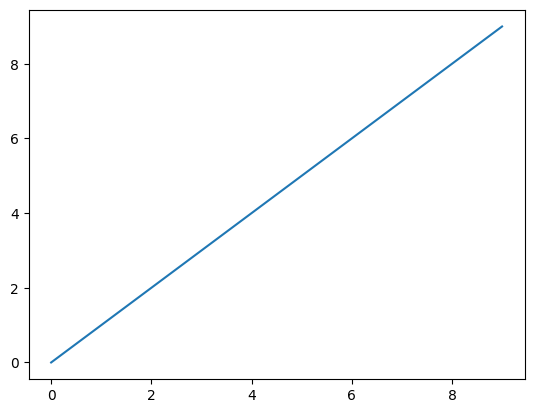

In [459]:
plt.plot(data)

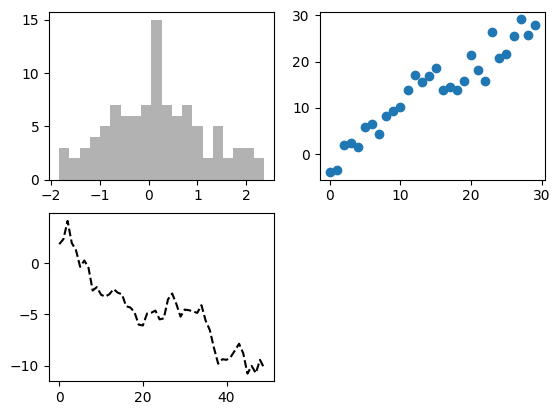

In [460]:
# Creating a figure object
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Plots
ax3.plot(np.random.standard_normal(50).cumsum(),
         color="black",
        linestyle="dashed");
# ';' used to supress the output about the object added to the plot
ax1.hist(np.random.standard_normal(100),
         bins=20,
         color="black",
         alpha=0.3);
ax2.scatter(np.arange(30),
            np.arange(30) + 3*np.random.standard_normal(30));

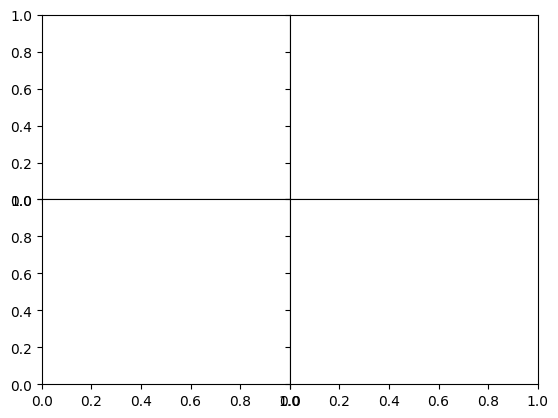

In [461]:
fig, axes = plt.subplots(2, 2,
                        sharex=True,
                        sharey=True)
fig.subplots_adjust(left=None,
                    bottom=None,
                    right=None,
                    top=None,
                    wspace=0,
                    hspace=0)

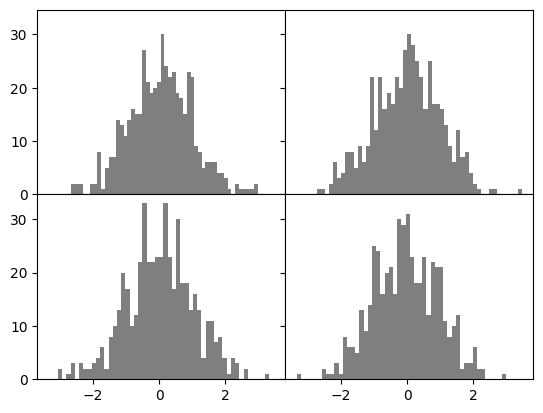

In [462]:
# adjusting wspace, hspace
fig, axes = plt.subplots(2, 2, sharex=True,
                         sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500),
                        bins=50,
                        color='black',
                        alpha=0.5)
fig.subplots_adjust(wspace=0,
                    hspace=0)

In [463]:
# supported
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

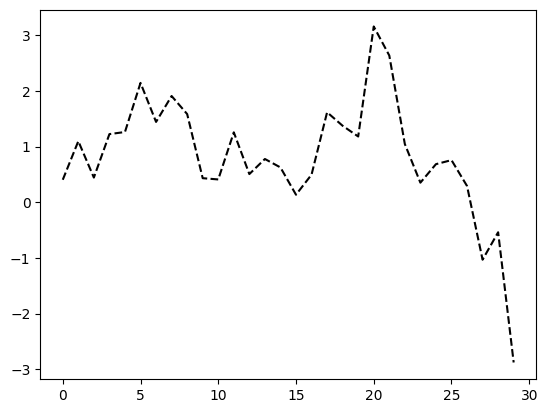

In [464]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(),
        color="black",
        linestyle="dashed",
        # marker="0"
       );

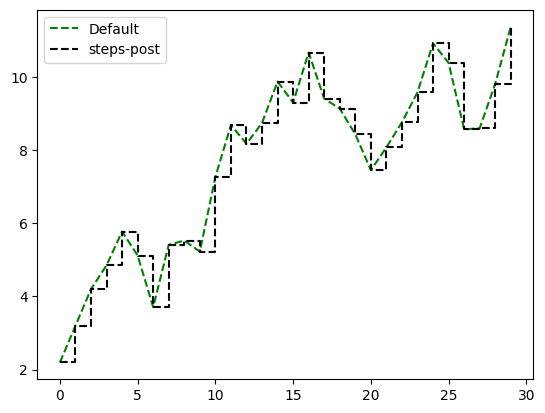

In [465]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data,
        color='green',
        linestyle='dashed',
        label='Default',
       );
ax.plot(data, color='black',
        linestyle='dashed',
        drawstyle='steps-post',
        label="steps-post",
       );
ax.legend();

<h3>Ticks, Labels and Legends</h3>

In [466]:
# Getting and settig xlim, ylim of the active or current subplot
ax.get_xlim()
ax.get_ylim()

(1.736525342456653, 11.834859414030777)

Text(0.5, 1.0, 'This plot')

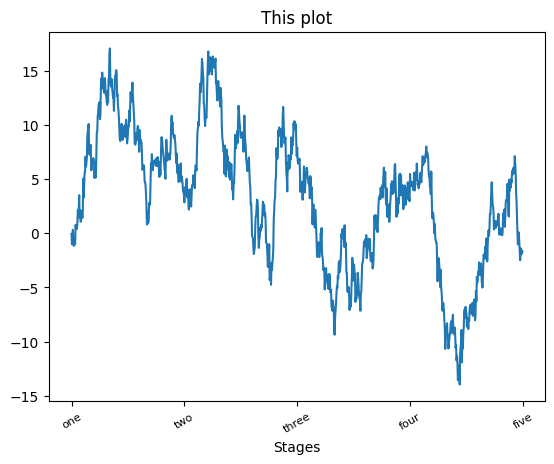

In [467]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1_000).cumsum());
ticks = ax.set_xticks([0, 250, 500, 750, 1_000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30,
                           fontsize=8,

                           )
# label the x-axis
ax.set_xlabel("Stages")

# plot title
ax.set_title("This plot")

<h3>Legends</h3>
<p>Legends aid to identify the different plots on a graph</p>

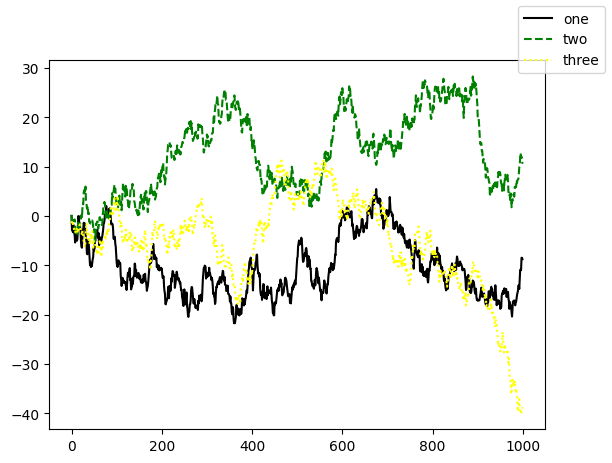

In [468]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1_000).cumsum(),
       color="black",
       label="one");
ax.plot(np.random.randn(1_000).cumsum(),
        color="green",
        linestyle="dashed",
        label="two"
       );
ax.plot(np.random.randn(1_000).cumsum(),
        color='yellow',
        linestyle='dotted',
        label="three");
fig.legend()

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

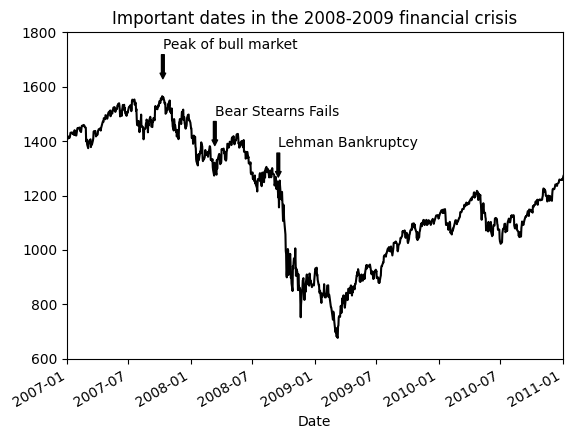

In [469]:
from datetime import datetime
fig, ax = plt.subplots()
data = pd.read_csv("../Data/spx.csv", index_col=0,
                   parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, color='black')
crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext = (date, spx.asof(date) + 225),
                          arrowprops=dict(facecolor='black',
                                          headwidth=4,
                                          width=2,
                                          headlength=4),
    horizontalalignment='left',
    verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")

<h3>Shapes</h3>

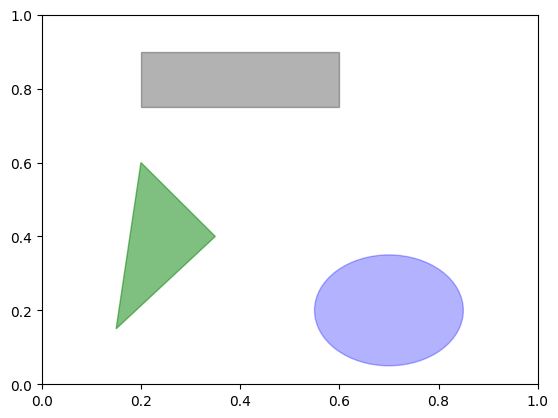

In [470]:
fig, ax = plt.subplots()
rect = plt.Rectangle((0.2, 0.75),
                     0.4, 0.15,
                     color="black",
                     alpha=0.3)
circ = plt.Circle((0.7, 0.2),
                  0.15,
                  color="blue",
                  alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15],
                    [0.35, 0.4],
                    [0.2, 0.6]],
                   color="green",
                   alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [471]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [472]:
plt.rc("figure", figsize=(10, 10))

In [473]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

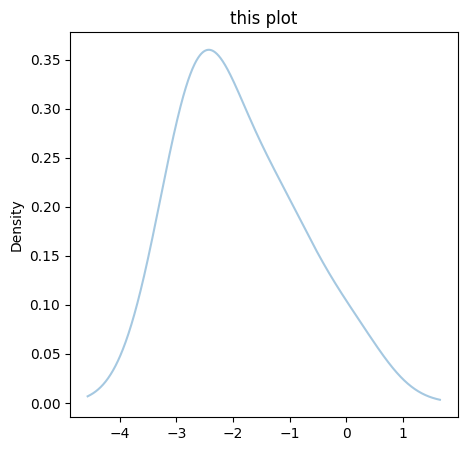

In [474]:
# Line Plots
# plt.rc("figure", figsize=(10, 10))
s = pd.Series(np.random.standard_normal(10).cumsum(),
              index=np.arange(0, 100, 10))
s.plot(
    figsize=(5, 5),
    alpha=0.4,
    label="this graph",
    # style="ko-",
    kind="kde",
    # logx=True,
    title="this plot",
    use_index=True,
);

In [475]:
# Plotting dataframe
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

In [476]:
df

,A,B,C,D
0,-1.770157,3.983245,-1.100703,-0.800949
10,-1.957307,2.245719,-1.034113,-1.834773
20,-2.459925,1.099596,0.067661,-0.238851
30,-3.198617,0.134275,-0.500805,1.371867
40,-3.121185,0.256343,-1.454623,1.566572
50,-2.235108,0.371091,-0.809430,0.986696
60,-2.684959,0.799523,-1.534211,-0.214256
70,-2.462651,-0.425992,-0.782199,-1.531050
80,-1.188605,0.793153,0.591304,-1.078079
90,-2.034833,0.899076,-0.702066,-2.254700


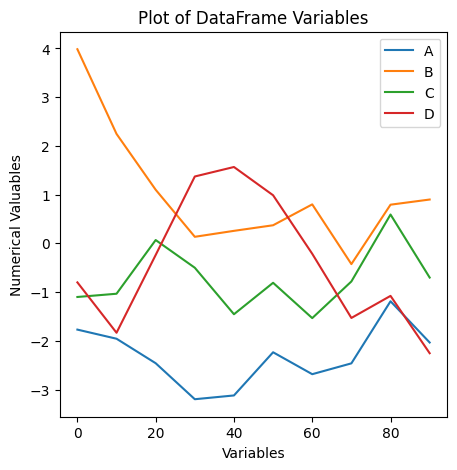

In [477]:
# plt.style.use('grayscale')
df.plot(figsize=(5, 5),
        title="Plot of DataFrame Variables",
        xlabel="Variables",
        ylabel="Numerical Valuables",
       );

In [478]:
# A Graduation DataFrame
grad = pd.DataFrame({"Graduates": [500, 631, 750, 893, 503, 819],
                     "First Classes": [30, 43, 81, 100, 210, 84],
                    },
                    index = ["CEDAT", "CoNAS", "CHS", "CEES", "CoBAMS", "CoVABS"],
                   )

In [479]:
grad

,Graduates,First Classes
CEDAT,500,30
CoNAS,631,43
CHS,750,81
CEES,893,100
CoBAMS,503,210
CoVABS,819,84


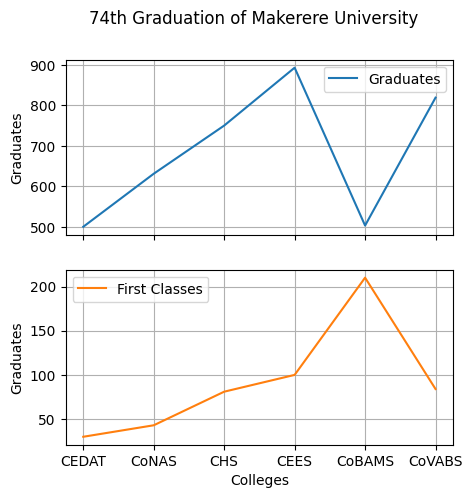

In [480]:
grad.plot(
    figsize=(5, 5),
    title="74th Graduation of Makerere University",
    xlabel="Colleges",
    ylabel="Graduates",
    grid=True,
    subplots=True,
);

<h3>Bar Plots</h3>
<p>pandas.plot.bar() and pandas.plot.barh() plot vertical and horizontal bars respectively.</p>

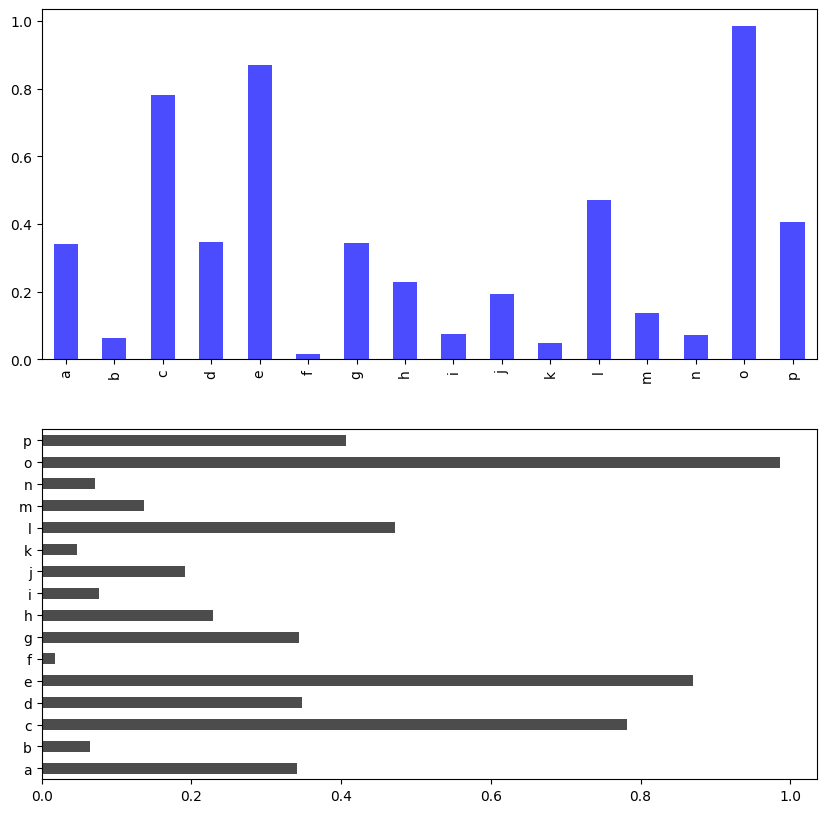

In [481]:
fig, axes = plt.subplots(2, 1)
# plt.style.use('grayscale');
data = pd.Series(np.random.uniform(size=16),
                 index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0],
              color="blue",
              alpha=0.7,
             );
data.plot.barh(ax=axes[1],
               color="black",
               alpha=0.7,
              );

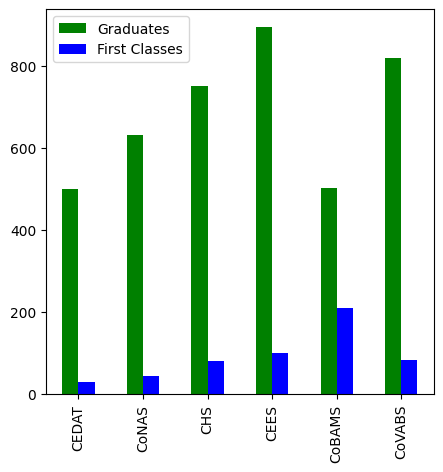

In [482]:
# Plotting grauation bar graphs
grad.plot.bar(
    figsize=(5,5),
    color=["Green", "Blue"],
);

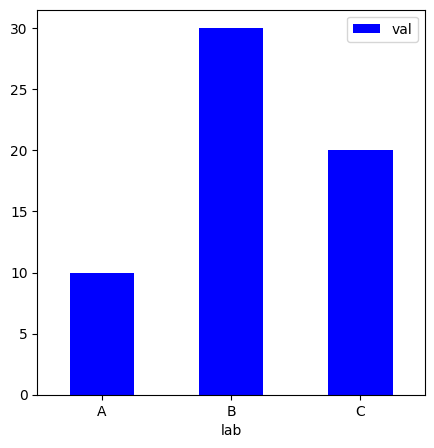

In [483]:
# More examples
df = pd.DataFrame({'lab': ['A', 'B', 'C'],
                   'val': [10, 30, 20]})
ax = df.plot.bar(x='lab',
                 y='val',
                 rot=0,
                figsize=(5, 5),
                 color="blue",
                );

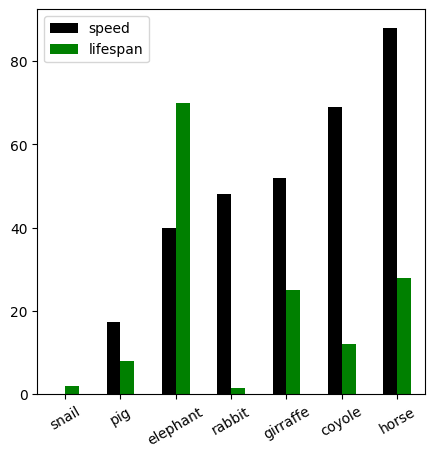

In [484]:
# TO-DO: Change background color to white
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'girraffe', 'coyole', 'horse']
df = pd.DataFrame({"speed": speed,
                   "lifespan": lifespan},
                   index=index,
                 )
# A bar plot
df.plot.bar(figsize=(5,5),
            color=['black', 'green'],
    rot=30);

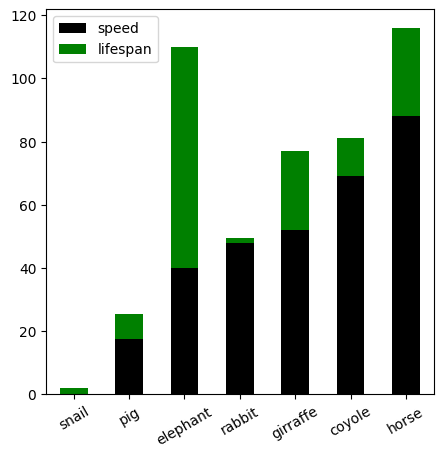

In [485]:
df.plot.bar(figsize=(5,5),
            color=['black', 'green'],
            stacked=True,
    rot=30);

In [486]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"],
                                   name="Genus"))
df

Genus,A,B,C,D
one,0.145322,0.240626,0.960991,0.025331
two,0.616298,0.426361,0.040902,0.565419
three,0.372057,0.982060,0.518027,0.853669
four,0.152445,0.904425,0.000619,0.737454
five,0.497586,0.348648,0.596514,0.453195
six,0.052831,0.920023,0.703015,0.625916


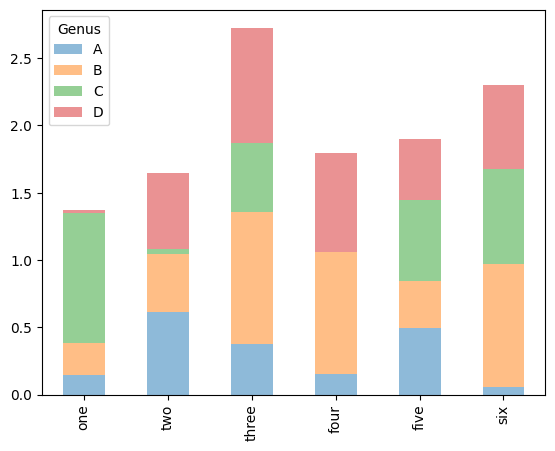

In [487]:
df.plot.bar(
    figsize=(6.5, 5),
    stacked=True,
    # color=['black', 'yellow', 'red', 'green'],
    alpha=0.5,
);

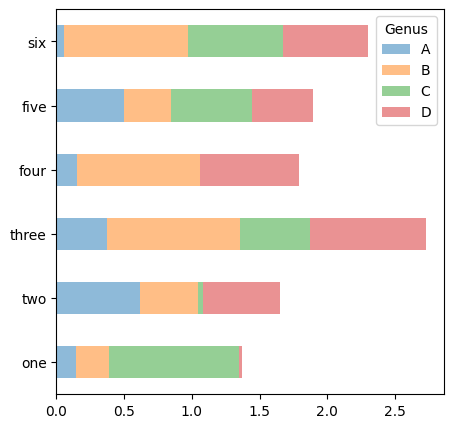

In [488]:
df.plot.barh(stacked=True,
             figsize=(5,5),
             alpha=0.5);

<h3>Coffee Price Trends</h3>

<ul>
    <li>Preprocessing</li>
    <li>Visualization</li>
    <li>Time Series</li>
    <li>Trending analysis</li>
</ul>

In [489]:
# Read excel
coffeePriceTrends = pd.read_excel("../Data/Coffee/Price_Trend_1992_93_2015_USD.xls")

dfcolumns = coffeePriceTrends.columns
dfcolumns[0]
# coffeePriceTrends
coffeePriceTrends = coffeePriceTrends.drop([dfcolumns[0], dfcolumns[-1]], axis=1).dropna(how="any")
# Get column names
newColumns = coffeePriceTrends.iloc[0, :].tolist()

# print("newColumns: ")
# print(newColumns)
# print("\n")

coffeePriceTrends = coffeePriceTrends.drop(3, )
# print(coffeePriceTrends.columns)

dictPrice = {coffeePriceTrends.columns[x]: newColumns[x] for x in range(len(newColumns))}
# print(dictPrice)
coffeePriceTrends = coffeePriceTrends.rename(dictPrice,
                                            axis=1,
                                            )
coffeePriceTrends = coffeePriceTrends.set_index('MONTH')

# Create a multiIndex
index = pd.MultiIndex.from_arrays([["UGX", "UGX", "UGX", "EX.RATE", "USD", "USD", "USD"], ["ROBUSTA KIBOKO", "ROBUSTA FAQ", "ARABICA PARCHMENT", "EX.RATE Sh/Kg", "ROBUSTA KIBOKO", "ROBUSTA FAQ", "ARABICA PARCHMENT"]])


coffeePriceTrends.columns = index

# coffeePriceTrends

In [490]:
coffeePriceTrendsUGX = coffeePriceTrends['UGX']

In [491]:
coffeePriceTrends

UGX                                \
                    ROBUSTA KIBOKO ROBUSTA FAQ ARABICA PARCHMENT   
MONTH                                                              
1992-07-01 00:00:00            210         420               499   
1992-08-01 00:00:00            220         440               500   
1992-09-01 00:00:00            215         400               502   
1992-10-01 00:00:00            225         450               510   
1992-11-01 00:00:00            250         500               550   
...                            ...         ...               ...   
2015-05-01 00:00:00           2200        4320              5600   
2015-06-01 00:00:00           2250        4500              5750   
2015-07-01 00:00:00           2200        4350              5850   
2015-08-01 00:00:00           2200        4500              6250   
2015-09-01 00:00:00           2150        4250              5750   

                          EX.RATE            USD                                
                    EX.RATE Sh/Kg ROBUSTA KIBOKO ROBUSTA FAQ ARABICA PARCHMENT  
MONTH                                                                           
1992-07-01 00:00:00       1177.86       0.178289    0.356579           0.42365  
1992-08-01 00:00:00       1185.29       0.185609    0.371217          0.421838  
1992-09-01 00:00:00       1185.15       0.181412     0.33751          0.423575  
1992-10-01 00:00:00       1181.07       0.190505     0.38101          0.431812  
1992-11-01 00:00:00       1196.34       0.208971    0.417941          0.459736  
...                           ...            ...         ...               ...  
2015-05-01 00:00:00        3007.6        0.73148    1.436361           1.86195  
2015-06-01 00:00:00        3199.9       0.703147    1.406294          1.796931  
2015-07-01 00:00:00       3360.09       0.654744    1.294608          1.741025  
2015-08-01 00:00:00       3548.25       0.620024    1.268231          1.761432  
2015-09-01 00:00:00        3667.5        0.58623    1.158828          1.567825  

[279 rows x 7 columns]

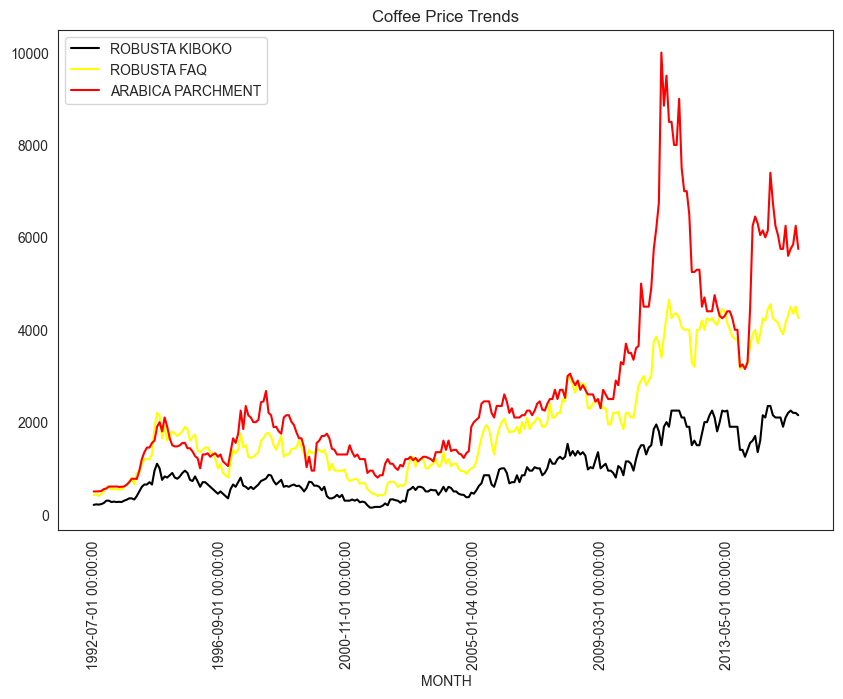

In [711]:
coffeePriceTrendsUGX.plot(
    rot=90,
    color=['black', 'yellow', 'red'],
    title="Coffee Price Trends",
    figsize=(10, 6.5),
);
plt.savefig("../Data/coffeePriceTrends.png");

# The USD graph may take the same shape: false

In [493]:
coffeePriceTrendsUSD = coffeePriceTrends['USD']

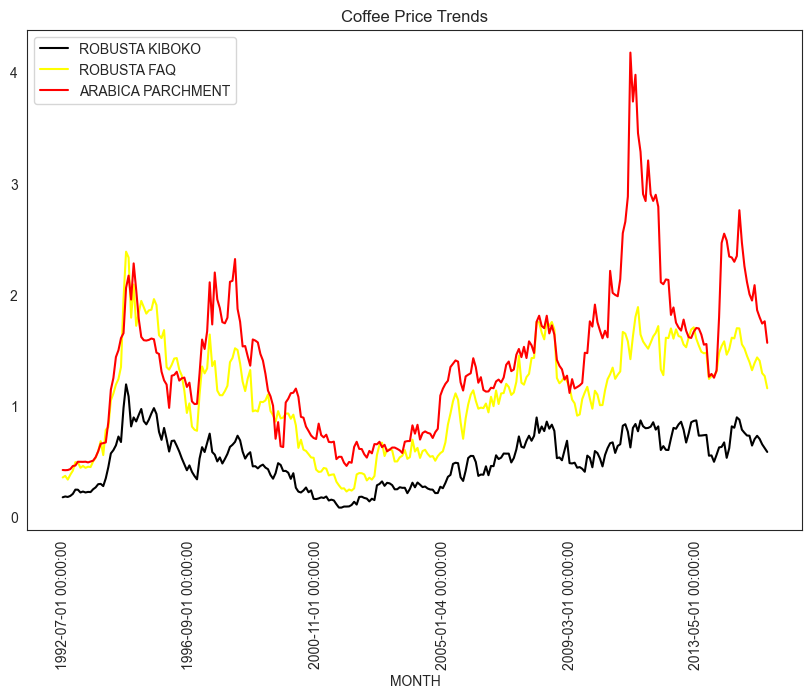

In [710]:
coffeePriceTrendsUSD.plot(
    figsize=(10, 6.5),
    title="Coffee Price Trends",
    color=['black', 'yellow', 'red'],
    rot=90,
);

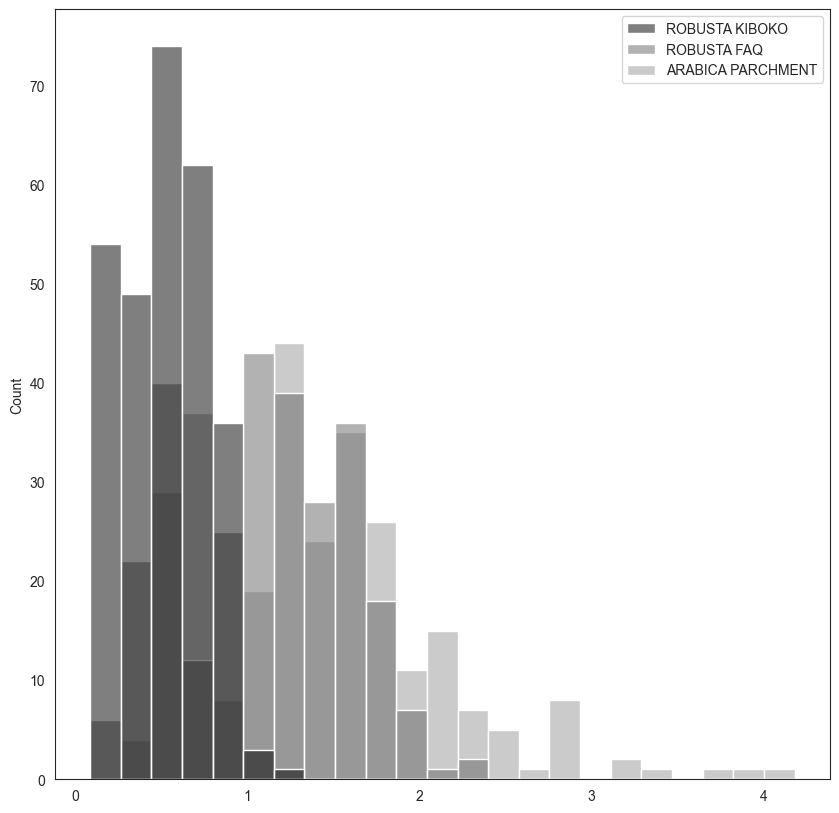

In [709]:
sns.histplot(data=coffeePriceTrendsUSD,
             # x="MONTH",
             # y="USD",
            );
plt.savefig("../Data/coffeePriceTrends2.png")

<h3>Tips Data</h3>

In [496]:
tips = pd.read_csv('../Data/tips.csv')

In [497]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [498]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [499]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [500]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

In [501]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [502]:
# Removing column:1 and column:6
party_counts = party_counts.loc[:, 2:5]

In [503]:
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [504]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                 axis="index")

In [505]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


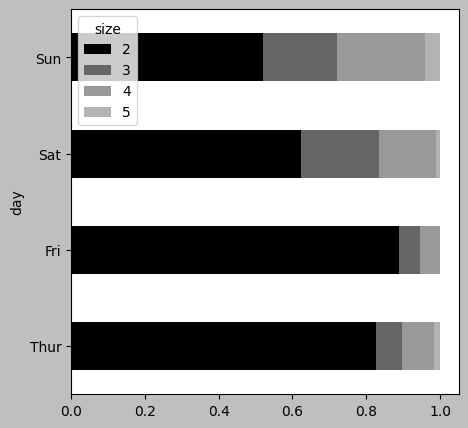

In [506]:
plt.style.use('grayscale')
party_pcts.plot.barh(
    stacked=True,
    figsize=(5, 5),
);

In [507]:
# tips percentage
tips["tip_pct"] = tips['tip'] / (tips['total_bill']-tips["tip"])

In [508]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


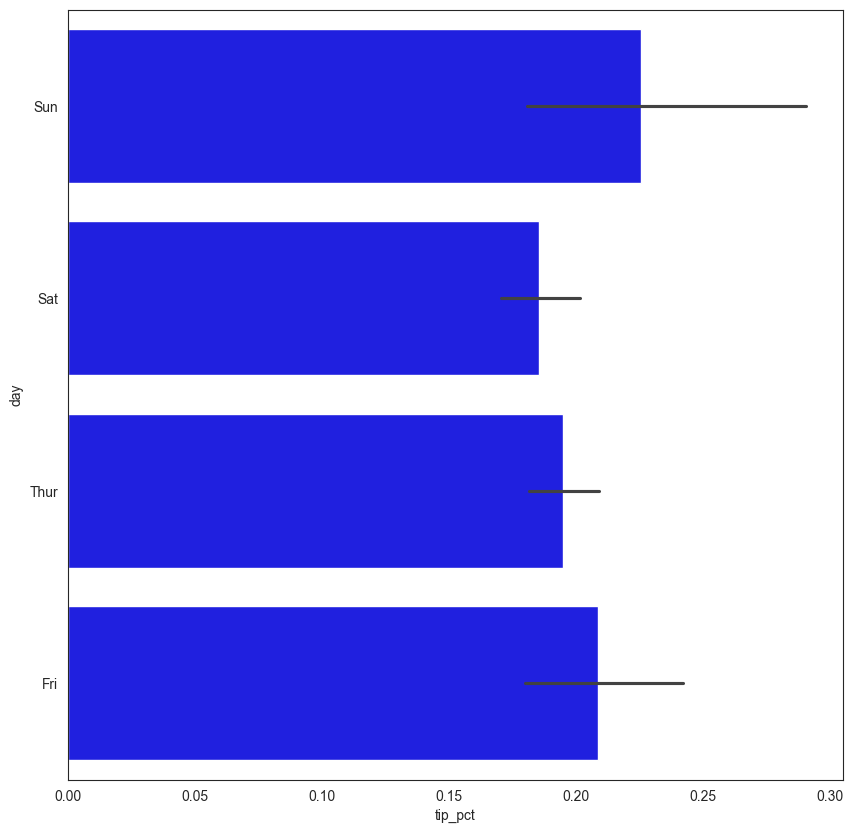

In [509]:
sns.set_style("white")
sns.barplot(x="tip_pct",
            y="day",
            data=tips,
            orient="h",
            color="blue",
            # capsize=0.2,
            # width=0.25,
           );

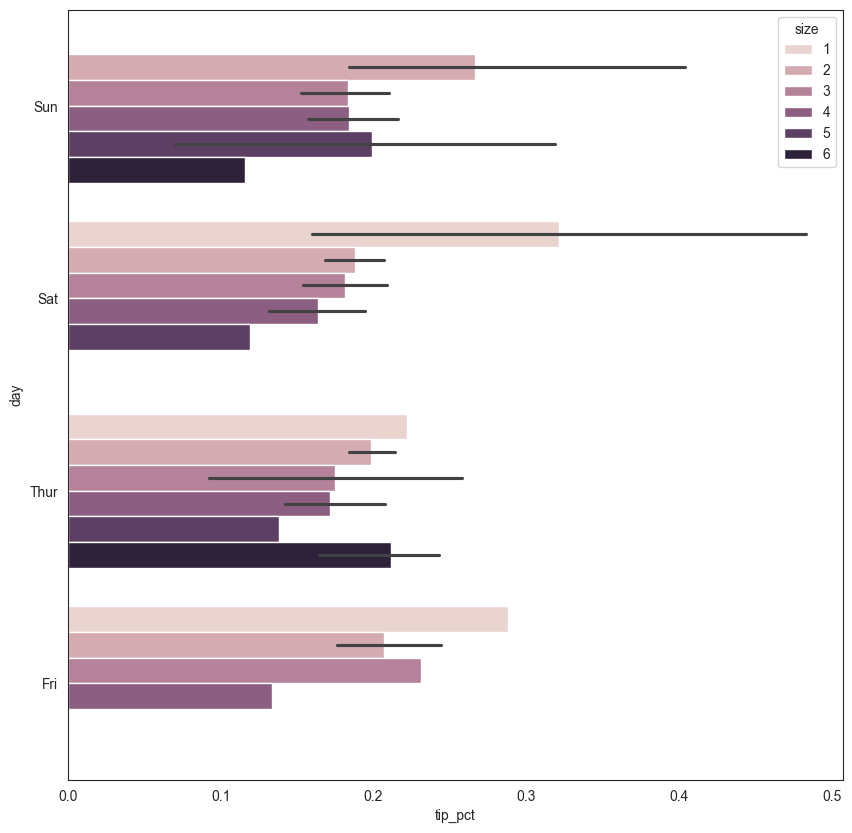

In [510]:
# hue enables to split aggregated data, say by time, smoker, size
# set palette color
# sns.set_palette("Greys_r")
sns.barplot(x="tip_pct",
            y="day",
            hue="size",
            data=tips,
            orient="h",
           );


<h3>Histograms and Density Plots</h3>
<p>A histogram is a representation of data <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist">distribution</a>.</p>

In [511]:
tips['tip_pct']

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
         ...   
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tip_pct, Length: 244, dtype: float64

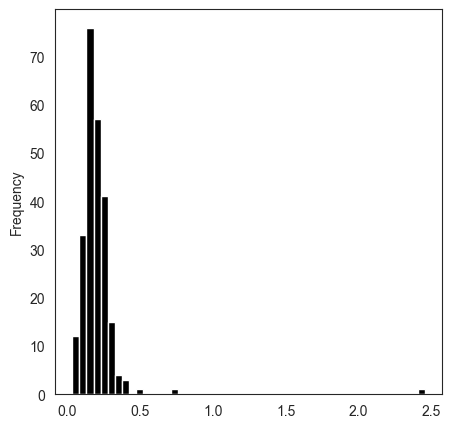

In [512]:
tips['tip_pct'].plot.hist(
    bins=50,
    figsize=(5, 5),
);

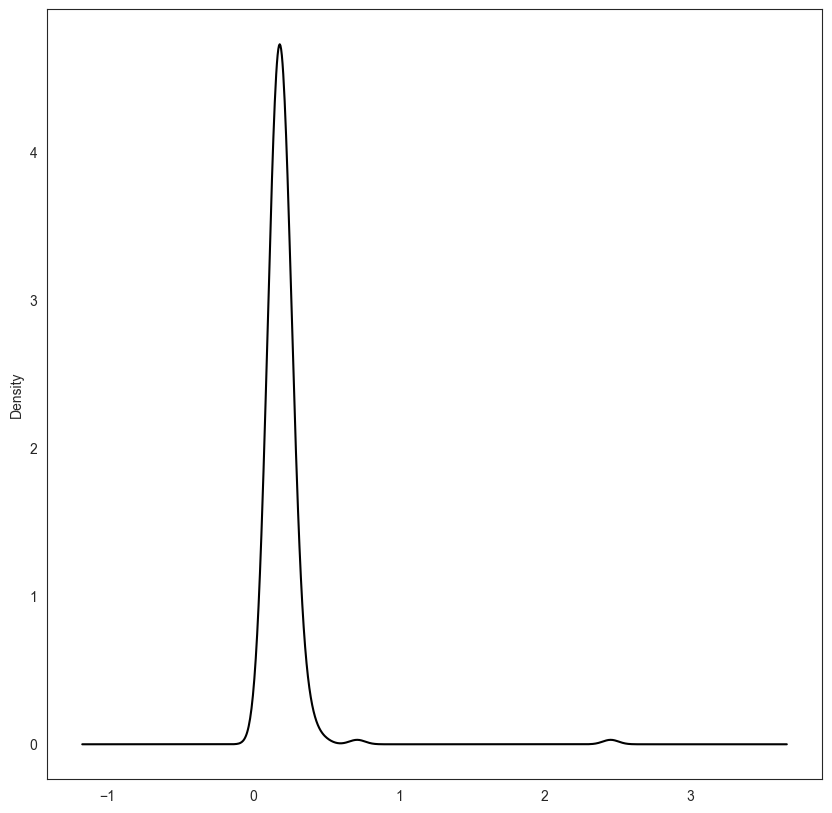

In [513]:
tips['tip_pct'].plot.density();

In [514]:
comp1 = np.random.standard_normal(200)
comp2 = 10+2*np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

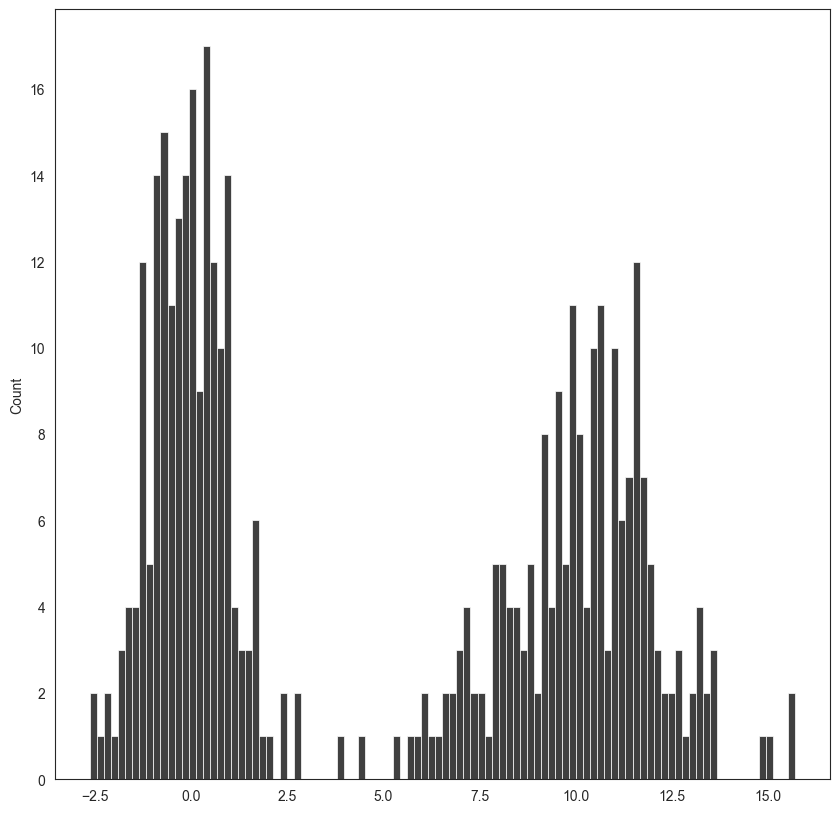

In [515]:
# bimodal distribution
sns.histplot(values,
             bins=100,
             color='black',
            );

<h3>Penguins Dataset</h3>

In [516]:
# Datasets in sns
# sns.get_dataset_names()

In [517]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


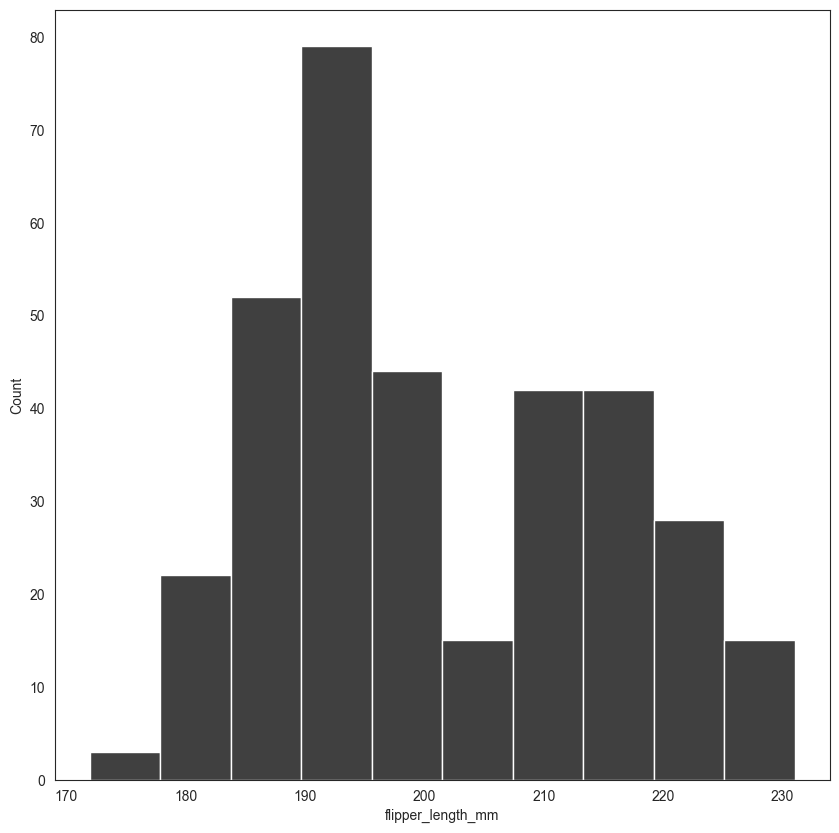

In [518]:
sns.histplot(data=penguins,
             x="flipper_length_mm",
            );

<h3>Scatter Plots</h3>
<p>A scatter plot plots data and a line <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html">regression model fit</a>.</p>

In [519]:
macro = pd.read_csv("../Data/macrodata.csv")

In [520]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]

In [521]:
trans_data = np.log(data).diff().dropna()

In [522]:
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


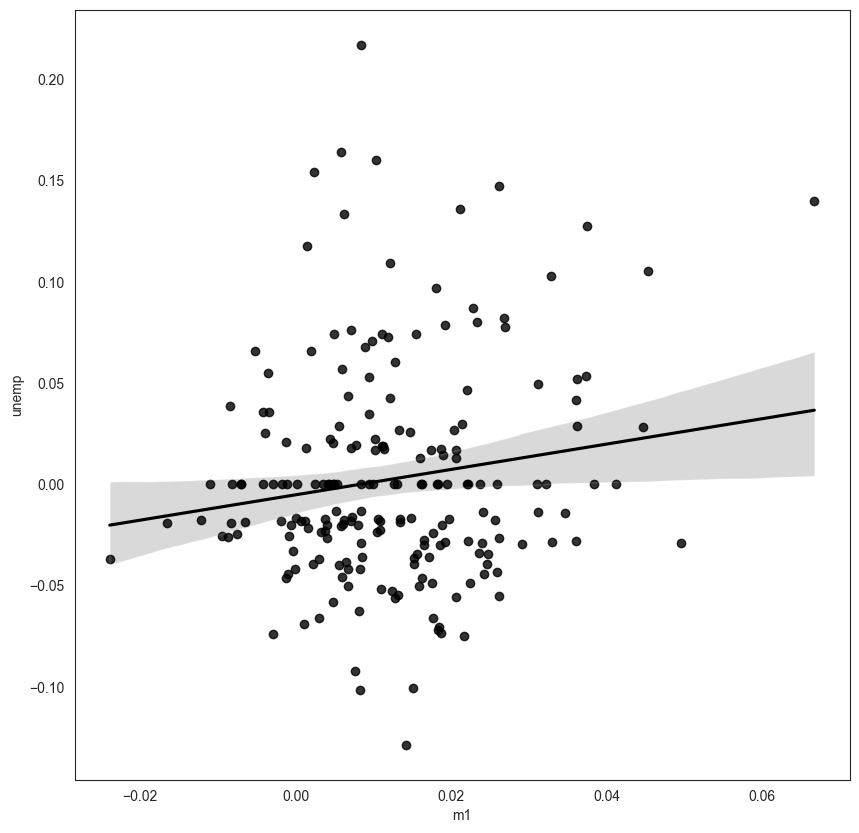

In [523]:
# What is a scatter plot
ax = sns.regplot(x="m1",
                 y="unemp",
                 data=trans_data,
                );

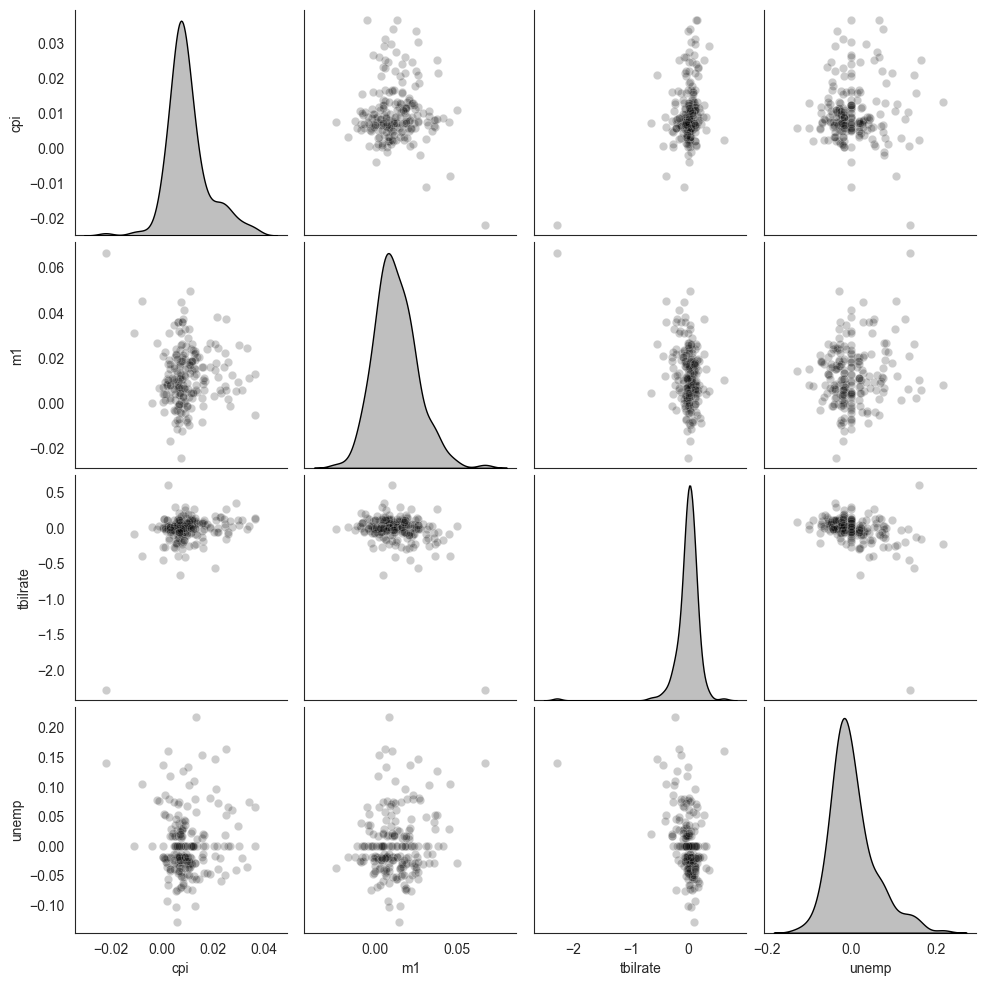

In [524]:
# Pair plot
sns.pairplot(trans_data,
             diag_kind='kde',
             plot_kws={"alpha": 0.2});

<h3>Facet Grids and Categorical Data</h3>

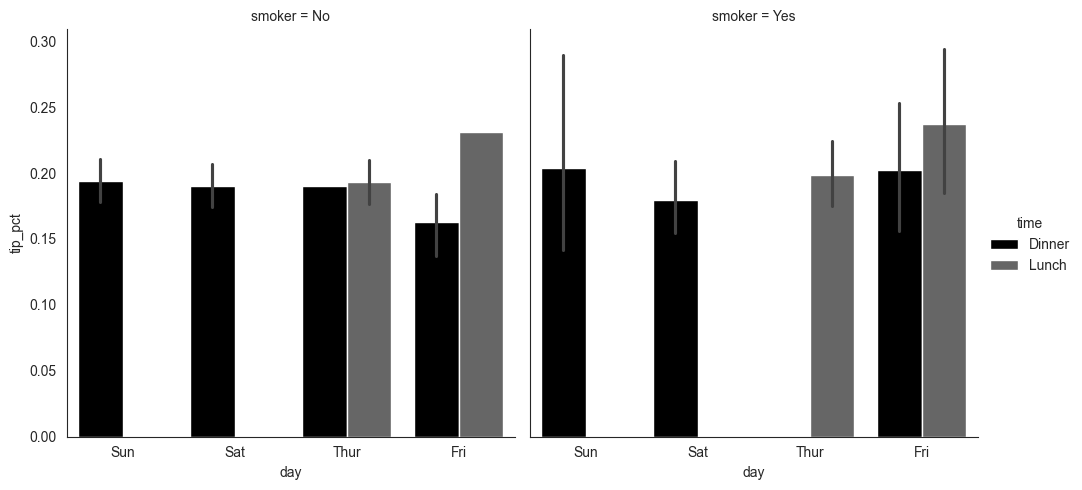

In [525]:
sns.catplot(x="day",
            y="tip_pct",
            hue="time",
            col="smoker",
            kind="bar",
            data=tips[tips.tip_pct<1],
           );

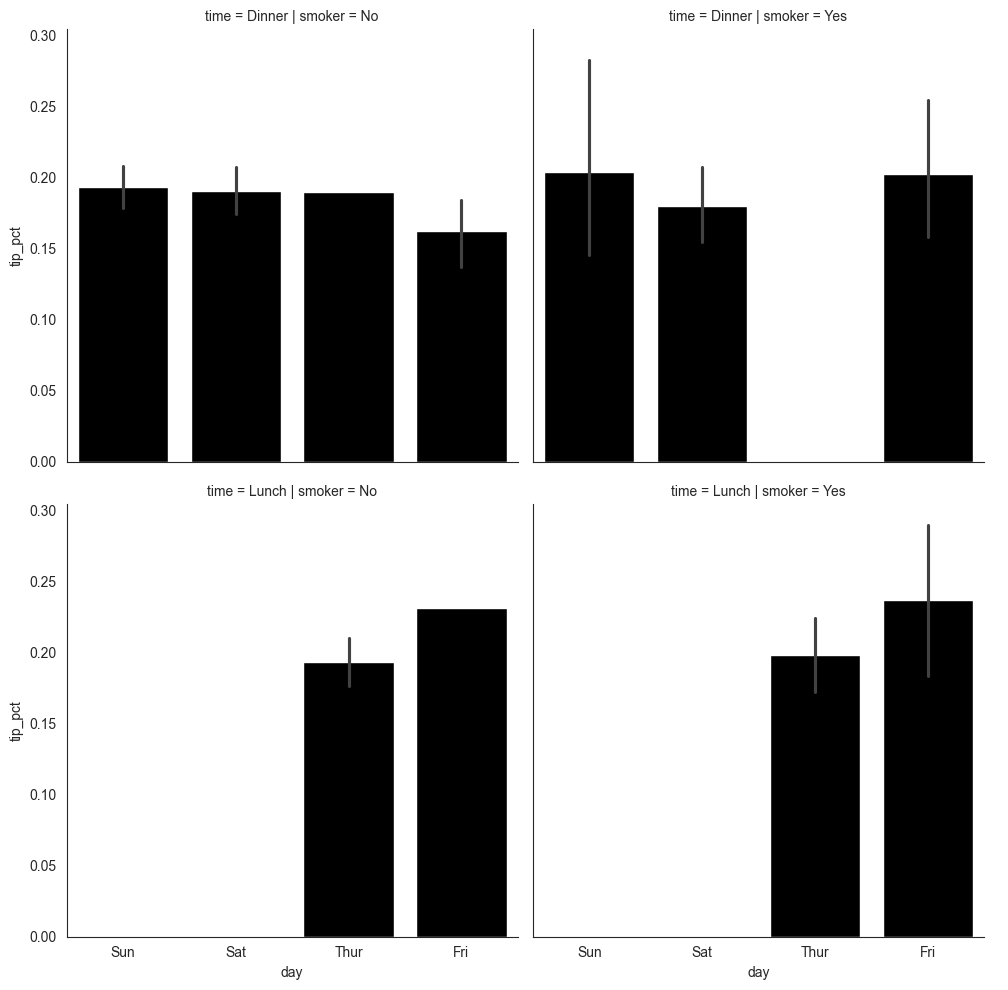

In [526]:
sns.catplot(x="day",
            y="tip_pct",
            row="time",
            col="smoker",
            kind="bar",
            data=tips[tips.tip_pct<1],
           );

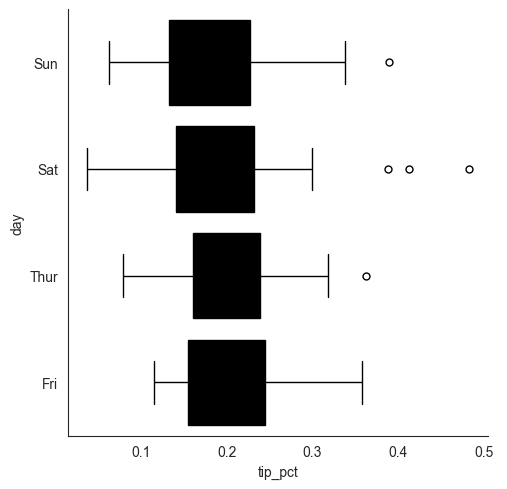

In [527]:
sns.catplot(
    x="tip_pct",
    y="day",
    kind="box",
    data=tips[tips.tip_pct < 0.5],
);

<h3>Other Resources</h3>
<ul>
    <li>Fundamentals of Data Visualization: Claus O. Wilke</li>
    <li>Visualizing Graph Data: Corey Lanum</li>
    <li>Everyday Data Visualization: Desire Abott</li>
    <li>Data Visualization with Python and JavaScript: Kryan Dale</li>
</ul>

<h1>Data Aggregation and Group Operations</h1>

<h3>Group By</h3>

In [528]:
df = pd.DataFrame({
    "key1": ["a", "a", None, "b", "b", "a", None],
    "key2": pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
    "data1": np.random.standard_normal(7),
    "data2": np.random.standard_normal(7)
})

In [529]:
df

,key1,key2,data1,data2
0,a,1,-1.528210,-1.149366
1,a,2,-1.422255,0.322051
2,None,1,0.237989,-0.022792
3,b,2,0.647552,0.256485
4,b,1,-0.037776,-0.771380
5,a,<NA>,0.073025,1.317088
6,None,1,0.049470,0.521541


In [530]:
grouped = df['data1'].groupby(df['key1'])

In [531]:
grouped.mean()

key1
a   -0.959147
b    0.304888
Name: data1, dtype: float64

In [532]:
means = df['data1'].groupby([df['key1'],
                            df['key2']]).mean()

In [533]:
means

key1  key2
a     1      -1.528210
      2      -1.422255
b     1      -0.037776
      2       0.647552
Name: data1, dtype: float64

In [534]:
means.unstack()

key2,1,2
key1,,
a,-1.528210,-1.422255
b,-0.037776,0.647552


In [535]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])
years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]
df['data1'].groupby([states, years]).mean()

CA  2005   -0.674615
    2006    0.237989
OH  2005   -0.440329
    2006    0.005847
Name: data1, dtype: float64

In [536]:
expenses  = pd.Series(np.arange(3, 10) * 1_000_000, dtype="Int64")

In [537]:
expenses

0    3000000
1    4000000
2    5000000
3    6000000
4    7000000
5    8000000
6    9000000
dtype: Int64

In [538]:
colleges = ["CEDAT", "CEDAT", "CEDAT", "CONAS", "CONAS", "CONAS", "CEDAT"]
fyQuarter = ["Q1", "Q4", "Q3", "Q1", "Q3", "Q2", "Q4"]

In [539]:
expenses.groupby([colleges, fyQuarter]).mean()

CEDAT  Q1    3000000.0
       Q3    5000000.0
       Q4    6500000.0
CONAS  Q1    6000000.0
       Q2    8000000.0
       Q3    7000000.0
dtype: Float64

In [540]:
# Find size in each category
expenses.groupby([colleges, fyQuarter]).size()

CEDAT  Q1    1
       Q3    1
       Q4    2
CONAS  Q1    1
       Q2    1
       Q3    1
dtype: Int64

In [541]:
# grouping by keys in the same dataframe
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,-0.959147,0.163258
b,1.5,0.304888,-0.257448


In [542]:
df.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1    -1.528210 -1.149366
     2    -1.422255  0.322051
b    1    -0.037776 -0.771380
     2     0.647552  0.256485

In [543]:
df.groupby(["key1", "key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [544]:
df.groupby("key1", dropna=False).size()

key1
a      3
b      2
NaN    2
dtype: int64

In [545]:
df.groupby(["key1", "key2"],
           dropna=False).size()

key1  key2
a     1       1
      2       1
      <NA>    1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [546]:
df.groupby("key1").count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


In [547]:
df

,key1,key2,data1,data2
0,a,1,-1.528210,-1.149366
1,a,2,-1.422255,0.322051
2,None,1,0.237989,-0.022792
3,b,2,0.647552,0.256485
4,b,1,-0.037776,-0.771380
5,a,<NA>,0.073025,1.317088
6,None,1,0.049470,0.521541


<h3>Iterating over groups</h3>
<p>The returned groupby object is iterable.</p>

In [548]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1 -1.528210 -1.149366
1    a     2 -1.422255  0.322051
5    a  <NA>  0.073025  1.317088
b
  key1  key2     data1     data2
3    b     2  0.647552  0.256485
4    b     1 -0.037776 -0.771380


In [549]:
# multiple key groupby
for (k1, k2), group in df.groupby(["key1", "key2"]):
    print((k1, k2))
    print(group)

('a', 1)
  key1  key2    data1     data2
0    a     1 -1.52821 -1.149366
('a', 2)
  key1  key2     data1     data2
1    a     2 -1.422255  0.322051
('b', 1)
  key1  key2     data1    data2
4    b     1 -0.037776 -0.77138
('b', 2)
  key1  key2     data1     data2
3    b     2  0.647552  0.256485


In [550]:
pieces = {name: group for name, group in df.groupby("key1")}

In [551]:
pieces

{'a':   key1  key2     data1     data2
 0    a     1 -1.528210 -1.149366
 1    a     2 -1.422255  0.322051
 5    a  <NA>  0.073025  1.317088,
 'b':   key1  key2     data1     data2
 3    b     2  0.647552  0.256485
 4    b     1 -0.037776 -0.771380}

In [552]:
pieces['a']

,key1,key2,data1,data2
0,a,1,-1.528210,-1.149366
1,a,2,-1.422255,0.322051
5,a,<NA>,0.073025,1.317088


In [553]:
pieces['b']

,key1,key2,data1,data2
3,b,2,0.647552,0.256485
4,b,1,-0.037776,-0.771380


In [554]:
grouped = df.T.groupby({"key1": "key",
                      "key2": "key",
                      "data1": "data",
                      "data2": "data"})                     

In [555]:
grouped.count()

,0,1,2,3,4,5,6
data,2,2,2,2,2,2,2
key,2,2,1,2,2,1,1


In [556]:
for group_key, group_values in grouped:
    print(group_key)
    print(group_values)

data
              0         1         2         3         4         5         6
data1  -1.52821 -1.422255  0.237989  0.647552 -0.037776  0.073025   0.04947
data2 -1.149366  0.322051 -0.022792  0.256485  -0.77138  1.317088  0.521541
key
      0  1     2  3  4     5     6
key1  a  a  None  b  b     a  None
key2  1  2     1  2  1  <NA>     1


<h3>Selecting a column or a subset of columns</h3>

In [557]:
df.groupby("key1")[["data2"]]

In [558]:
# this aggregates by a subset of columns as returns a dataframe
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    1    -1.149366
     2     0.322051
b    1    -0.771380
     2     0.256485

In [559]:
# This aggregates by a column and returns a series
df.groupby(["key1", "key2"])["data2"].mean()

key1  key2
a     1      -1.149366
      2       0.322051
b     1      -0.771380
      2       0.256485
Name: data2, dtype: float64

In [560]:
s_grouped = df.groupby(["key1", "key2"])["data2"]

In [561]:
s_grouped.mean()

key1  key2
a     1      -1.149366
      2       0.322051
b     1      -0.771380
      2       0.256485
Name: data2, dtype: float64

<h3>Grouping with Dictionaries and Series</h3>

In [562]:
people = pd.DataFrame(np.random.standard_normal((5,5)),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wanda', 'Jill', 'Trey'])

In [563]:
people

,a,b,c,d,e
Joe,3.073058,-0.077967,-0.460283,-0.037903,-0.906754
Steve,-0.770129,0.173748,-1.805330,-1.342916,0.224970
Wanda,0.446053,-0.047530,0.033891,-0.594576,-0.327738
Jill,0.793830,-0.926292,0.725794,-1.149838,-0.213781
Trey,2.157446,-0.180180,0.614675,0.995067,-0.596348


In [564]:
people.iloc[2, [1, 2]] = np.nan

In [565]:
people

,a,b,c,d,e
Joe,3.073058,-0.077967,-0.460283,-0.037903,-0.906754
Steve,-0.770129,0.173748,-1.805330,-1.342916,0.224970
Wanda,0.446053,NaN,NaN,-0.594576,-0.327738
Jill,0.793830,-0.926292,0.725794,-1.149838,-0.213781
Trey,2.157446,-0.180180,0.614675,0.995067,-0.596348


In [566]:
mapping = {"a": "red", "b": "red", "c": "blue", "d": "blue", "e": "red", "f": "orange"}

In [567]:
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [568]:
by_column = people.T.groupby(mapping).mean()

In [569]:
by_column

,Joe,Steve,Wanda,Jill,Trey
blue,-0.249093,-1.574123,-0.594576,-0.212022,0.804871
red,0.696113,-0.123804,0.059157,-0.115415,0.460306


In [570]:
map_series = pd.Series(mapping)

In [571]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [572]:
people.T.groupby(map_series).count()               

,Joe,Steve,Wanda,Jill,Trey
blue,2,2,1,2,2
red,3,3,2,3,3


<h3>Grouping with Functions</h3>

In [573]:
# computes sum of numerical values for index with the same length
people.groupby(len).sum()

,a,b,c,d,e
3,3.073058,-0.077967,-0.460283,-0.037903,-0.906754
4,2.951276,-1.106473,1.340469,-0.154771,-0.810129
5,-0.324077,0.173748,-1.805330,-1.937492,-0.102768


In [574]:
key_list = ["one", "one", "one", "two", "two"]
people.groupby([len, key_list]).min()

,,a,b,c,d,e
3,one,3.073058,-0.077967,-0.460283,-0.037903,-0.906754
4,two,0.793830,-0.926292,0.614675,-1.149838,-0.596348
5,one,-0.770129,0.173748,-1.805330,-1.342916,-0.327738


In [575]:
for x, y in people.groupby([len, key_list]):
    print(x)
    print(y)

(3, 'one')
            a         b         c         d         e
Joe  3.073058 -0.077967 -0.460283 -0.037903 -0.906754
(4, 'two')
             a         b         c         d         e
Jill  0.793830 -0.926292  0.725794 -1.149838 -0.213781
Trey  2.157446 -0.180180  0.614675  0.995067 -0.596348
(5, 'one')
              a         b        c         d         e
Steve -0.770129  0.173748 -1.80533 -1.342916  0.224970
Wanda  0.446053       NaN      NaN -0.594576 -0.327738


In [576]:
people

,a,b,c,d,e
Joe,3.073058,-0.077967,-0.460283,-0.037903,-0.906754
Steve,-0.770129,0.173748,-1.805330,-1.342916,0.224970
Wanda,0.446053,NaN,NaN,-0.594576,-0.327738
Jill,0.793830,-0.926292,0.725794,-1.149838,-0.213781
Trey,2.157446,-0.180180,0.614675,0.995067,-0.596348


<h3>Group By Index Levels</h3>

In [577]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                     [1, 3, 5, 1, 3]],
                                    names=["cty", "tenor"])

In [578]:
columns

MultiIndex([('US', 1),
            ('US', 3),
            ('US', 5),
            ('JP', 1),
            ('JP', 3)],
           names=['cty', 'tenor'])

In [579]:
hier_df = pd.DataFrame(np.random.standard_normal((4, 5)),
                       columns=columns)

In [580]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.197667  0.109967 -0.414072  0.127324 -1.701314
1      0.161988  1.216024  0.053788 -1.617126  0.508143
2      1.076934  0.003706  0.012593 -1.035703  0.379089
3     -1.244210  0.404165 -0.024113 -0.289034 -0.252886

In [581]:
hier_df.T.groupby(level="cty").count()

,0,1,2,3
cty,,,,
JP,2,2,2,2
US,3,3,3,3


In [582]:
hier_df.T.groupby(level="tenor").count()

,0,1,2,3
tenor,,,,
1,2,2,2,2
3,2,2,2,2
5,1,1,1,1


<h3>Data Aggregation</h3>

In [583]:
df

,key1,key2,data1,data2
0,a,1,-1.528210,-1.149366
1,a,2,-1.422255,0.322051
2,None,1,0.237989,-0.022792
3,b,2,0.647552,0.256485
4,b,1,-0.037776,-0.771380
5,a,<NA>,0.073025,1.317088
6,None,1,0.049470,0.521541


In [584]:
grouped = df.groupby("key1")
grouped['data1'].nsmallest(2)

key1   
a     0   -1.528210
      1   -1.422255
b     4   -0.037776
      3    0.647552
Name: data1, dtype: float64

In [585]:
# aggregate custom function
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [586]:
grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,1.601235,2.466454
b,1,0.685328,1.027865


In [587]:
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0 -0.959147  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  0.304888  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a    -0.674615  0.073025   3.0  0.163258  1.240871 -1.149366 -0.413658   
b     0.476220  0.647552   2.0 -0.257448  0.726810 -0.771380 -0.514414   

                                    
           50%       75%       max  
key1                                
a     0.322051  0.819569  1.317088  
b    -0.257448 -0.000481  0.256485  

[2 rows x 24 columns]

<h3>Column-Wise and Multiple Function Application</h3>

In [588]:
tips = pd.read_csv("../Data/tips.csv")

In [589]:
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [590]:
# tip percentage = tip / total_bill
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

In [591]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [592]:
grouped = tips.groupby(["day", "smoker"])

In [593]:
grouped_pct = grouped["tip_pct"]

In [594]:
grouped_pct

In [595]:
grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [596]:
grouped_pct.agg(["mean", "std", peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [597]:
# Passing column names
grouped_pct.agg([("average", "mean"),
("stdev", "std")])

average     stdev
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [598]:
# Applying function on a subset of columns
functions = ["count", "mean", "max"]
result = grouped[["tip_pct", "total_bill"]].agg(functions)

In [599]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [600]:
# Accessing a singular column
result['total_bill']

count       mean    max
day  smoker                         
Fri  No          4  18.420000  22.75
     Yes        15  16.813333  40.17
Sat  No         45  19.661778  48.33
     Yes        42  21.276667  50.81
Sun  No         57  20.506667  48.17
     Yes        19  24.120000  45.35
Thur No         45  17.113111  41.19
     Yes        17  19.190588  43.11

In [601]:
ftuples = [("Averages", "mean"),
           ("Variance", "var")]

In [602]:
grouped[["tip_pct", "total_bill"]].agg(ftuples)

tip_pct           total_bill            
             Averages  Variance   Averages    Variance
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [603]:
# Applying different functions to dofferent columns
grouped.agg({"tip": ["max", "mean"],
             "size": "sum"}
           )

tip           size
               max      mean  sum
day  smoker                      
Fri  No       3.50  2.812500    9
     Yes      4.73  2.714000   31
Sat  No       9.00  3.102889  115
     Yes     10.00  2.875476  104
Sun  No       6.00  3.167895  167
     Yes      6.50  3.516842   49
Thur No       6.70  2.673778  112
     Yes      5.00  3.030000   40

In [604]:
grouped.agg({"tip_pct": ["min", "max", "mean", "std"],
             "size": "sum"}
           )

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

<h3>Returning Aggregated Data without Row Indexes</h3>

In [605]:
tips.groupby(["day", "smoker"],
             # as_index=False,
            )[['total_bill']].mean()

total_bill
day  smoker            
Fri  No       18.420000
     Yes      16.813333
Sat  No       19.661778
     Yes      21.276667
Sun  No       20.506667
     Yes      24.120000
Thur No       17.113111
     Yes      19.190588

<h3>Apply: General split-apply-combine</h3>

In [606]:
# function
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column,
                          ascending=False,
                         )[:n]

In [607]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [608]:
tips.groupby(by="smoker").apply(top,
                               include_groups=False,
                               )

total_bill   tip   day    time  size   tip_pct
smoker                                                    
No     232       11.61  3.39   Sat  Dinner     2  0.291990
       149        7.51  2.00  Thur   Lunch     2  0.266312
       51        10.29  2.60   Sun  Dinner     2  0.252672
       185       20.69  5.00   Sun  Dinner     5  0.241663
       88        24.71  5.85  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15   Sun  Dinner     2  0.710345
       178        9.60  4.00   Sun  Dinner     2  0.416667
       67         3.07  1.00   Sat  Dinner     1  0.325733
       183       23.17  6.50   Sun  Dinner     4  0.280535
       109       14.31  4.00   Sat  Dinner     2  0.279525

In [609]:
# using other arguments
tips.groupby(["smoker", "day"]).apply(top,
                                      n=4,
                                      column="total_bill",
                                      include_groups=False,
                                     )

total_bill    tip    time  size   tip_pct
smoker day                                                
No     Fri  94        22.75   3.25  Dinner     2  0.142857
            91        22.49   3.50  Dinner     2  0.155625
            223       15.98   3.00   Lunch     3  0.187735
            99        12.46   1.50  Dinner     2  0.120385
       Sat  212       48.33   9.00  Dinner     4  0.186220
            59        48.27   6.73  Dinner     4  0.139424
            23        39.42   7.58  Dinner     4  0.192288
            238       35.83   4.67  Dinner     3  0.130338
       Sun  156       48.17   5.00  Dinner     6  0.103799
            112       38.07   4.00  Dinner     3  0.105070
            11        35.26   5.00  Dinner     4  0.141804
            52        34.81   5.20  Dinner     4  0.149382
       Thur 142       41.19   5.00   Lunch     5  0.121389
            85        34.83   5.17   Lunch     4  0.148435
            141       34.30   6.70   Lunch     6  0.195335
            125       29.80   4.20   Lunch     6  0.140940
Yes    Fri  95        40.17   4.73  Dinner     4  0.117750
            90        28.97   3.00  Dinner     2  0.103555
            96        27.28   4.00  Dinner     2  0.146628
            98        21.01   3.00  Dinner     2  0.142789
       Sat  170       50.81  10.00  Dinner     3  0.196812
            102       44.30   2.50  Dinner     3  0.056433
            207       38.73   3.00  Dinner     4  0.077459
            56        38.01   3.00  Dinner     4  0.078927
       Sun  182       45.35   3.50  Dinner     3  0.077178
            184       40.55   3.00  Dinner     2  0.073983
            180       34.65   3.68  Dinner     4  0.106205
            179       34.63   3.55  Dinner     2  0.102512
       Thur 197       43.11   5.00   Lunch     4  0.115982
            83        32.68   5.00   Lunch     2  0.152999
            192       28.44   2.56   Lunch     2  0.090014
            204       20.53   4.00   Lunch     4  0.194837

In [610]:
result = tips.groupby("smoker")["tip_pct"].describe()

In [611]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [612]:
result.unstack("smoker")

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

<h3>Suppressing Group Keys</h3>

In [613]:
tips.groupby("smoker",
             group_keys=False,
            ).apply(top,
                   include_groups=False,
                   )

,total_bill,tip,day,time,size,tip_pct
232,11.61,3.39,Sat,Dinner,2,0.291990
149,7.51,2.00,Thur,Lunch,2,0.266312
51,10.29,2.60,Sun,Dinner,2,0.252672
185,20.69,5.00,Sun,Dinner,5,0.241663
88,24.71,5.85,Thur,Lunch,2,0.236746
172,7.25,5.15,Sun,Dinner,2,0.710345
178,9.60,4.00,Sun,Dinner,2,0.416667
67,3.07,1.00,Sat,Dinner,1,0.325733
183,23.17,6.50,Sun,Dinner,4,0.280535
109,14.31,4.00,Sat,Dinner,2,0.279525


<h3>Quartile and Bucket Analysis</h3>

In [614]:
frame = pd.DataFrame({"data1": np.random.standard_normal(1_000),
                      "data2": np.random.standard_normal(1_000)
                     })
frame.head()

,data1,data2
0,-0.136926,0.418928
1,-0.343645,-0.810815
2,-0.153471,2.012884
3,-0.771228,-0.242286
4,-0.221128,0.623791


In [615]:
quartiles = pd.cut(frame["data1"], 4)

In [616]:
quartiles.head(10)

0     (-0.2, 1.522]
1    (-1.923, -0.2]
2     (-0.2, 1.522]
3    (-1.923, -0.2]
4    (-1.923, -0.2]
5     (-0.2, 1.522]
6     (-0.2, 1.522]
7    (-1.923, -0.2]
8    (-1.923, -0.2]
9    (-1.923, -0.2]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(-3.652, -1.923] < (-1.923, -0.2] < (-0.2, 1.522] < (1.522, 3.244]]

In [617]:
# stats function
def get_stats(group):
    return pd.DataFrame(
        {
            "min": group.min(),
            "max": group.max(),
            "count": group.count(),
            "mean": group.mean()
        }
    )

In [618]:
grouped = frame.groupby(quartiles,
                       observed=False,
                       )

In [619]:
grouped.apply(get_stats)

min       max  count      mean
data1                                                      
(-3.652, -1.923] data1 -3.644946 -1.932235     21 -2.367912
                 data2 -1.852179  1.084949     21 -0.178755
(-1.923, -0.2]   data1 -1.912759 -0.200626    429 -0.810501
                 data2 -3.288294  2.790578    429 -0.038965
(-0.2, 1.522]    data1 -0.195033  1.509188    489  0.506352
                 data2 -2.609627  2.920133    489  0.032559
(1.522, 3.244]   data1  1.541059  3.244203     61  1.964141
                 data2 -1.847716  2.561831     61  0.115955

In [620]:
# Achieving the same
grouped.agg(["min", "max", "count", "mean"])

data1                               data2            \
                       min       max count      mean       min       max   
data1                                                                      
(-3.652, -1.923] -3.644946 -1.932235    21 -2.367912 -1.852179  1.084949   
(-1.923, -0.2]   -1.912759 -0.200626   429 -0.810501 -3.288294  2.790578   
(-0.2, 1.522]    -0.195033  1.509188   489  0.506352 -2.609627  2.920133   
(1.522, 3.244]    1.541059  3.244203    61  1.964141 -1.847716  2.561831   

                                  
                 count      mean  
data1                             
(-3.652, -1.923]    21 -0.178755  
(-1.923, -0.2]     429 -0.038965  
(-0.2, 1.522]      489  0.032559  
(1.522, 3.244]      61  0.115955

In [621]:
# Using qcut
# Quartile-based discretization function
quartiles_samp = pd.qcut(frame["data1"],
                         4,
                         labels=False,
                        )

In [622]:
quartiles_samp

0      1
1      1
2      1
3      0
4      1
      ..
995    3
996    3
997    1
998    0
999    2
Name: data1, Length: 1000, dtype: int64

In [623]:
grouped = frame.groupby(quartiles_samp)
grouped.apply(get_stats)

min       max  count      mean
data1                                           
0     data1 -3.644946 -0.703487    250 -1.235922
      data2 -2.799491  2.750879    250 -0.057760
1     data1 -0.703383 -0.083117    250 -0.381160
      data2 -3.288294  2.888581    250  0.025437
2     data1 -0.081700  0.607237    250  0.249425
      data2 -2.579322  2.480540    250  0.019975
3     data1  0.617951  3.244203    250  1.247607
      data2 -2.609627  2.920133    250  0.022446

<h3>Filling in Missing Data with Group Specific Values</h3>

In [624]:
s = pd.Series(np.random.standard_normal(6))

In [625]:
s

0   -1.349683
1   -0.554849
2   -0.688910
3   -0.145333
4   -0.656715
5    0.321828
dtype: float64

In [626]:
s[::2] = np.nan

In [627]:
s

0         NaN
1   -0.554849
2         NaN
3   -0.145333
4         NaN
5    0.321828
dtype: float64

In [628]:
# filling with mean value
s.fillna(s.mean())

0   -0.126118
1   -0.554849
2   -0.126118
3   -0.145333
4   -0.126118
5    0.321828
dtype: float64

In [629]:
# Filling with specific values for each group
districts = ["Iganga", "Jinja", "Mbale", "Bugiri", "Kabale", "Mbarara", "Rukungiri", "Fort Portal"]
group_key = ["East", "East", "East", "East", "West", "West", "West", "West"]

In [630]:
data = pd.Series(np.random.standard_normal(8), index=districts)

In [631]:
data

Iganga        -0.265148
Jinja          0.406368
Mbale          0.246582
Bugiri         2.422432
Kabale         0.657275
Mbarara       -1.337030
Rukungiri     -0.890974
Fort Portal    0.592640
dtype: float64

In [632]:
# setting some values to be missing
data[["Jinja", "Kabale", "Mbarara"]] = np.nan

In [633]:
data

Iganga        -0.265148
Jinja               NaN
Mbale          0.246582
Bugiri         2.422432
Kabale              NaN
Mbarara             NaN
Rukungiri     -0.890974
Fort Portal    0.592640
dtype: float64

In [634]:
# size includes Nan values
data.groupby(group_key).size()

East    4
West    4
dtype: int64

In [635]:
# count doesn't include nan values
data.groupby(group_key).count()

East    3
West    2
dtype: int64

In [636]:
# getting group means
data.groupby(group_key).mean()

East    0.801289
West   -0.149167
dtype: float64

In [637]:
# filling nan values with mean
def fill_mean(group):
    return group.fillna(group.mean())

In [638]:
data.groupby(group_key).apply(fill_mean)

East  Iganga        -0.265148
      Jinja          0.801289
      Mbale          0.246582
      Bugiri         2.422432
West  Kabale        -0.149167
      Mbarara       -0.149167
      Rukungiri     -0.890974
      Fort Portal    0.592640
dtype: float64

In [639]:
data

Iganga        -0.265148
Jinja               NaN
Mbale          0.246582
Bugiri         2.422432
Kabale              NaN
Mbarara             NaN
Rukungiri     -0.890974
Fort Portal    0.592640
dtype: float64

In [640]:
# filling with specific values for different groups
fill_values = {
    "East": 0.5,
    "West": -1
}

In [641]:
def fill_func(group):
    return group.fillna(fill_values[group.name])

In [642]:
data.groupby(group_key).apply(fill_func)

East  Iganga        -0.265148
      Jinja          0.500000
      Mbale          0.246582
      Bugiri         2.422432
West  Kabale        -1.000000
      Mbarara       -1.000000
      Rukungiri     -0.890974
      Fort Portal    0.592640
dtype: float64

<h3>Example: Random Sampling and Permutations</h3>

In [643]:
suits = ["H", "S", "C", "D"] #hearts, Spades, Clubs, Diamonds
card_val = (list(range(1, 11)) + [10]*3)*4
base_names = ["A"] + list(range(2, 11)) + ["J", "K", "Q"]
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val,
                 index=cards)

In [644]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [645]:
# Drawing samples
def draw(deck, n=5):
    return deck.sample(n)

In [646]:
draw(deck,
    n=4,
    )

10D    10
QC     10
3C      3
KS     10
dtype: int64

In [647]:
# Getting cards from each suit
def get_suit(card):
    return card[-1]

In [648]:
# Group by a function result
deck.groupby(get_suit).apply(draw, 
                             n=2,
                            )

C  10C    10
   QC     10
D  2D      2
   JD     10
H  7H      7
   10H    10
S  6S      6
   4S      4
dtype: int64

In [649]:
deck.groupby(get_suit,
             # group_keys=False,
            ).apply(draw,
                    n=2,
                   )

C  AC     1
   3C     3
D  6D     6
   JD    10
H  3H     3
   5H     5
S  3S     3
   8S     8
dtype: int64

<h3>Group Weighted Average and Correlation</h3>

In [650]:
df = pd.DataFrame({
    "category": ["a", "a", "a", "a",
                 "b", "b", "b", "b"
                ],
    "data": np.random.standard_normal(8),
    "weights": np.random.uniform(size=8)
})

In [651]:
df

,category,data,weights
0,a,0.322940,0.238530
1,a,0.712955,0.567621
2,a,-0.273517,0.666536
3,a,-0.518031,0.334551
4,b,1.762255,0.214391
5,b,-0.742665,0.904082
6,b,-0.001268,0.994830
7,b,0.582244,0.190004


In [652]:
# weighted average
grouped = df.groupby("category")
def get_wavg(group):
    return np.average(group["data"],
                      weights=group["weights"]
                     )

In [653]:
grouped.apply(get_wavg,
             include_groups=False,
             )

category
a    0.069777
b   -0.079994
dtype: float64

In [654]:
# computing weighted average
data = np.arange(1,5)

In [655]:
data

array([1, 2, 3, 4])

In [656]:
np.average(data)

2.5

In [657]:
np.average(np.arange(1,11),
           weights=np.arange(10, 0, -1),
          )

4.0

In [658]:
data = np.arange(6).reshape((3,2))

In [659]:
data

array([[0, 1],
       [2, 3],
       [4, 5]])

In [660]:
np.average(data,
           axis=1,
           weights=[1./4, 3./4,
                    # 2./4
                   ],
           returned=True,
           keepdims=True,
          )

(array([[0.75],
        [2.75],
        [4.75]]),
 array([[1.],
        [1.],
        [1.]]))

In [661]:
# spx
close_px = pd.read_csv("../Data/stock_px.csv",
                       parse_dates=True,
                       index_col=0,
                      )

In [662]:
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [663]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [664]:
# function for corr
def spx_corr(group):
    return group.corrwith(group['SPX'])

In [665]:
rets = close_px.pct_change().dropna()

In [666]:
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [667]:
def get_year(x):
    return x.year

In [668]:
by_year = rets.groupby(get_year)

In [669]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [670]:
# column corr
def corr_aapl_msft(group):
    return group["AAPL"].corr(group["MSFT"])

In [671]:
by_year.apply(corr_aapl_msft)

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

<h3>Group-Wise Linear Regression</h3>

In [672]:
def regress(data, yvar=None, xvars=None):
    Y = data[yvar]
    X = data[xvars]
    X["intercept"] = 1
    result = sm.OLS(Y, X).fit()
    return result.params

In [673]:
by_year.apply(regress, yvar="AAPL",
              xvars=["SPX"]
             )

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


In [674]:
# duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")

In [675]:
# duncan_prestige.data

<h3>Group Transforms and "Unwrapped" GroupBys</h3>

In [676]:
df = pd.DataFrame(
    {"key":['a', 'b', 'c']*4,
     "value": np.arange(12.)
    })

In [677]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [678]:
g = df.groupby("key")['value']

In [679]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [680]:
# Producing a series with the same shape as df['value']
def get_mean(group):
    return group.mean()

In [681]:
g.transform(get_mean)

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [682]:
# transform with a function
def times_half(group):
    return group*0.5

In [683]:
g.transform(times_half)

0     0.0
1     0.5
2     1.0
3     1.5
4     2.0
5     2.5
6     3.0
7     3.5
8     4.0
9     4.5
10    5.0
11    5.5
Name: value, dtype: float64

In [684]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [685]:
# ranking with trandform
def get_ranks(group):
    return group.rank(ascending=False)

In [686]:
g.transform(get_ranks)

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [687]:
g.apply(get_ranks)

key    
a    0     4.0
     3     3.0
     6     2.0
     9     1.0
b    1     4.0
     4     3.0
     7     2.0
     10    1.0
c    2     4.0
     5     3.0
     8     2.0
     11    1.0
Name: value, dtype: float64

In [688]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [689]:
# Normalize
def normalize(x):
    return (x-x.mean())/x.std()

In [690]:
%timeit g.transform(normalize)

1.34 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [691]:
# inbuilt aggregation functions are faster than the general apply functions
%timeit (df['value']-g.transform('mean'))/g.transform('std')

426 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [692]:
# More examples
df = pd.DataFrame({"A": range(3),
                   "B": range(1,4)
                  })

In [693]:
df

,A,B
0,0,1
1,1,2
2,2,3


In [694]:
# transform returns a dataframe of the same shape along the chosen axis.
df.transform(lambda x: np.sqrt(x))

,A,B
0,0.000000,1.000000
1,1.000000,1.414214
2,1.414214,1.732051


In [695]:
s = pd.Series(np.random.standard_normal(12))

In [696]:
s

0     0.400151
1     0.429815
2    -0.968864
3    -0.195074
4    -0.952805
5     0.698230
6    -1.309527
7    -1.537089
8     1.052188
9    -2.770680
10   -0.803304
11   -0.075958
dtype: float64

In [697]:
s.transform([np.sqrt, np.exp])

,sqrt,exp
0,0.632575,1.492050
1,0.655603,1.536974
2,NaN,0.379514
3,NaN,0.822774
4,NaN,0.385658
5,0.835602,2.010192
6,NaN,0.269948
7,NaN,0.215006
8,1.025762,2.863910
9,NaN,0.062619


In [698]:
# Here, apply and transform return the same results
s.apply([np.sqrt, np.exp])

,sqrt,exp
0,0.632575,1.492050
1,0.655603,1.536974
2,NaN,0.379514
3,NaN,0.822774
4,NaN,0.385658
5,0.835602,2.010192
6,NaN,0.269948
7,NaN,0.215006
8,1.025762,2.863910
9,NaN,0.062619


<h3>Pivot Tables and Cross-Tabulation</h3>

In [699]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [700]:
# pivoting table
# tips.pivot_table(index=["day", "smoker"],
#                 observed=False,
#                 )

In [701]:
# More examples

In [702]:
df = pd.DataFrame({
    "A": ["foo", "foo", "foo", "foo", "foo", "bar", "bar", "bar", "bar"],
    "B" : ["one", "one", "one", "two", "two", "one", "one", "two", "two"],
    "C": ["small", "large", "large", "small", "small", "large", "small", "small", "large"],
    "D": [1, 2, 4, 5, 6, 3, 6, 4, 6],
    "E": [5, 6, 3, 5, 3, 6, 2, 5, 2]
})

In [703]:
df

,A,B,C,D,E
0,foo,one,small,1,5
1,foo,one,large,2,6
2,foo,one,large,4,3
3,foo,two,small,5,5
4,foo,two,small,6,3
5,bar,one,large,3,6
6,bar,one,small,6,2
7,bar,two,small,4,5
8,bar,two,large,6,2


In [704]:
table = pd.pivot_table(df,
                       values='D',
                       index=['A', 'B'],
                       columns=['C'],
                       aggfunc="sum",
                      )

In [705]:
table

C        large  small
A   B                
bar one    3.0    6.0
    two    6.0    4.0
foo one    6.0    1.0
    two    NaN   11.0

In [706]:
# filling missing values
pd.pivot_table(df, values='D',
               index=['A', 'B'],
               columns=['C'],
               aggfunc=["sum", "mean",
                        # "std",
                       ],
               fill_value=0,
               margins=True,
              )

sum            mean                
C       large small All large small       All
A   B                                        
bar one     3     6   9  3.00   6.0  4.500000
    two     6     4  10  6.00   4.0  5.000000
foo one     6     1   7  3.00   1.0  2.333333
    two     0    11  11  0.00   5.5  5.500000
All        15    22  37  3.75   4.4  4.111111

In [707]:
pd.read_xml("../Data/iati-activities-Uganda.xml")

,default-currency,hierarchy,last-updated-datetime,lang,iati-identifier,reporting-org,title,description,participating-org,activity-status,...,default-aid-type,default-tied-status,transaction,conditions,mechanism-signing-date,tec1,state-location,duns-number,document-link,budget
0,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-720201350764,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,None,None,None
1,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-720201350765,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,None,None,None
2,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-720201350921,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,None,None,None
3,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-720201350922,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,None,None,None
4,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-720201351075,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-DOT-I-02-03-00007-07,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,\n,None,None
858,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-FFP-A-00-08-00075-00,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,\n,None,None
859,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-FFP-G-00-07-00078-00,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,\n,None,None
860,USD,1,2024-05-13T16:17:41.838Z,en,US-GOV-1-GPH-A-00-02-00008-32,\n,\n,\n,\n,NaN,...,NaN,NaN,\n,NaN,NaN,\n,\n,None,None,None
